# Importing Librarys and Dataset after filtering

In [ ]:
!pip install haversine

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#distance calculations from lon and lat
from haversine import haversine
from scipy import stats

Data Retrieval

In [ ]:
# CSV file is uploaded in the temporary memory. You might have to upload the file first
df = pd.read_csv('/content/Travel Tide filtered v2.csv')

#checking for mistakes (should be 49211)
print(len(df))

49211


Converting object data back to Datetime

In [ ]:
def convert_columns_to_datetime(df, columns):
  for column in columns:
    df[column] = pd.to_datetime(df[column], errors='coerce')
  return df

#Columns to convert to Datetime format:
columns_to_convert = ['session_start', 'session_end', 'departure_time', 'return_time', 'check_in_time', 'check_out_time', 'birthdate']

df = convert_columns_to_datetime(df, columns_to_convert)

# EDA

Possible Questions:
- Query the users table to get a breakdown of users by gender, marital status, and whether they have children.

- What is the distribution of the user's birth year? Do you spot any irregularity there? What is special about birth year 2006? How would you calculate the age based on birth date?

- You may define “customer age” as a period in months since the user signed up to the platform. What is the average “customer age” of TravelTide user?

- What are the 10 most popular hotels? Include the information about the average duration of stay and average price before the discount. Do the same for most expensive hotels (top 10), hotels with the longest stays and etc.

Plenty of questions might be asked about the flight table. Just a few examples to ignite your creativity:

- What is the most used airline in the last 6 months of recorded data?

- What is the average number of seats booked on flights via TravelTide?

- What is the variability of the price for the same flight routes over different seasons?

##Tables overview

###Understand the Dataset

In [ ]:
#rows, columns
df.shape

(49211, 41)

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

                                session_id  user_id  \
0  745292-56c1515d6f8c4bd1b2e576a84f9832fb   745292   
1  746934-f89114ebc70c4239bc6c3e92b3169ad1   746934   
2  748759-be174c28d89c4faea77ee9feebd45f59   748759   
3  195192-cee53ca0dcf245bb845c190046503380   195192   
4  229330-021cb1699498402c847cf2b50f6bc929   229330   

                                   trip_id       session_start  \
0                                      NaN 2023-04-14 13:29:00   
1                                      NaN 2023-04-14 03:24:00   
2                                      NaN 2023-04-14 19:21:00   
3  195192-f810ae7ac3cd493e9aed47e52ffc47ad 2023-04-15 19:45:00   
4                                      NaN 2023-04-15 13:16:00   

          session_end  flight_discount  hotel_discount  \
0 2023-04-14 13:29:29            False           False   
1 2023-04-14 03:24:59            False           False   
2 2023-04-14 19:22:44            False           False   
3 2023-04-15 19:47:13            False  

Filter for Datatypes

In [ ]:
#Filter for numeric columns
numeric_cols = df.select_dtypes(include=[np.number])
#removing location data and other useless numbers
numeric_cols_to_drop = ["home_airport_lat", "home_airport_lon", "destination_airport_lat", "destination_airport_lon", "user_id"]
numeric_cols = numeric_cols.drop(columns=numeric_cols_to_drop)
numeric_cols

,flight_discount_amount,hotel_discount_amount,page_clicks,seats,checked_bags,base_fare_usd,nights,rooms,hotel_per_room_usd
0,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,18,2.0,0.0,394.29,1.0,2.0,160.0
4,NaN,0.10,13,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
49206,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
49207,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN
49208,0.2,0.15,8,NaN,NaN,NaN,NaN,NaN,NaN
49209,0.4,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN


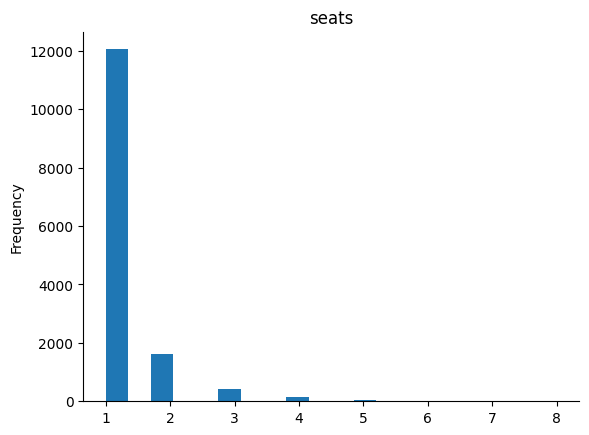

In [ ]:
numeric_cols['seats'].plot(kind='hist', bins=20, title='seats')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df[df["flight_booked"] == False].count()

session_id                 34891
user_id                    34891
trip_id                     2382
session_start              34891
session_end                31988
flight_discount            34891
hotel_discount             34891
flight_discount_amount      6312
hotel_discount_amount       4446
flight_booked              34891
hotel_booked               34891
page_clicks                34891
cancellation               34891
birthdate                  34891
gender                     34891
married                    34891
has_children               34891
home_country               34891
home_city                  34891
home_airport               34891
home_airport_lat           34891
home_airport_lon           34891
sign_up_date               34891
origin_airport                 0
destination                    0
destination_airport            0
seats                          0
return_flight_booked           0
departure_time                 0
return_time                    0
checked_ba

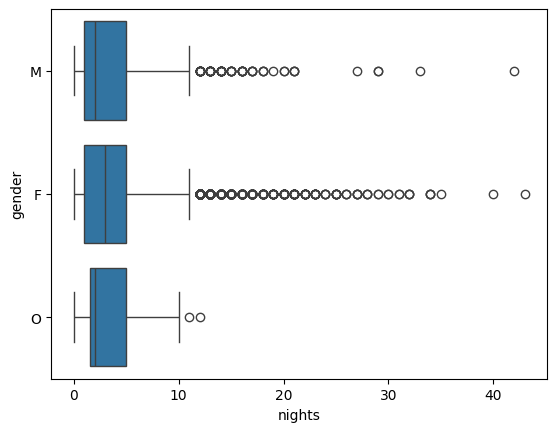

In [ ]:
# Create a relplot
sns.boxplot(data=df, x="nights", y="gender")

# Show the plot
plt.show()

###Filtering faulty Data

In [ ]:
#removing 107 rows from the dataset because of nonsensical values with negative night values
df = df[~((df['nights'] == -1) | (df['nights'] == -2))]

In [ ]:
print(df.info)

<bound method DataFrame.info of                                     session_id  user_id  \
0      745292-56c1515d6f8c4bd1b2e576a84f9832fb   745292   
1      746934-f89114ebc70c4239bc6c3e92b3169ad1   746934   
2      748759-be174c28d89c4faea77ee9feebd45f59   748759   
3      195192-cee53ca0dcf245bb845c190046503380   195192   
4      229330-021cb1699498402c847cf2b50f6bc929   229330   
...                                        ...      ...   
49206  700237-ba2f4d04dd3b4ab08b2a13399ba236ae   700237   
49207  710489-8aa0b63118354b2bad4adf45fc2517fd   710489   
49208  714420-64bc8d82455c4df9bbea8806c734b43a   714420   
49209  720819-86615e4652cf464da85a2d7b75226286   720819   
49210  734565-6f85f45258664e09861ae7954596ae58   734565   

                                       trip_id       session_start  \
0                                          NaN 2023-04-14 13:29:00   
1                                          NaN 2023-04-14 03:24:00   
2                                          NaN 20

###Business Questions

Query the users table to get a breakdown of users by gender, marital status, and whether they have children.

#Feature Engineering

In [ ]:
## User demographic information

# 1. age
df['age'] = df['session_start'].dt.year - df['birthdate'].dt.year
user_age = df.groupby('user_id')['age'].mean()

# 2. gender
user_gender = df.groupby('user_id')['gender'].first()

# 3. married
user_married = df.groupby('user_id')['married'].first()

# 4. has_children
user_has_children = df.groupby('user_id')['has_children'].first()

# 5.home_country
user_home_country = df.groupby('user_id')['home_country'].first()

# 6.home_city
user_home_city = df.groupby('user_id')['home_city'].first()


In [ ]:
## sessions info

# 1. session_count
session_count = df.groupby('user_id')['session_id'].count().rename('session_count')

# 2. avg_session_duration_minute
df['session_duration'] = (df['session_end'] - df['session_start']).dt.total_seconds() / 60
avg_session_duration_minute = df.groupby('user_id')['session_duration'].mean().rename('avg_session_duration_minute')

# 3. avg_page_clicks
avg_page_clicks = df.groupby('user_id')['page_clicks'].mean().rename('avg_page_clicks')

In [ ]:
## booking behaviour

# 1. amount of trips
total_trip = df.groupby('user_id')['trip_id'].nunique().rename('total_trip')

# 2. conversion_rate
conversion_rate = df.groupby('user_id')['trip_id'].apply(lambda x: x.notnull().mean()).rename('conversion_rate')

# 3. cancellation_proportion
# converting boolean to int
df['cancellation'] = df['cancellation'].astype(int)
cancellation_proportion = df.groupby('user_id')['cancellation'].mean().rename('cancellation_proportion')

# 4. weekend_trip_proportion
weekend_trip_proportion = df[df['trip_id'].notnull()].groupby('user_id')['departure_time'].apply(lambda x: (x.dt.weekday >= 5).mean()).rename('weekend_trip_proportion')

# 5. avg_booking_departure_gap_days_flights/hotels
df['booking_departure_gap_days'] = (df['departure_time'] - df['session_start']).dt.days
avg_booking_departure_gap_days_flights = df[df['flight_booked']].groupby('user_id')['booking_departure_gap_days'].mean().rename('avg_booking_departure_gap_days_flights')
avg_booking_departure_gap_days_hotels = df[df['hotel_booked']].groupby('user_id')['booking_departure_gap_days'].mean().rename('avg_booking_departure_gap_days_hotels')


In [ ]:
## flights behaviour

# 1. total flights booked
total_flights_booked = df.groupby('user_id')['flight_booked'].sum().rename('total_flights_booked')

# 2. return trips proportion
return_trips_proportion = df.groupby('user_id')['return_flight_booked'].mean().rename('return_trips_proportion')

# 3. avg flight price usd
avg_flight_price_usd = df[df['flight_booked']].groupby('user_id')['base_fare_usd'].mean().rename('avg_flight_price_usd')

# 4. avg flight discount amount
avg_flight_discount_amount = df.groupby('user_id')['flight_discount_amount'].mean().rename('avg_flight_discount_amount')

# 5. discounted flight proportion
discounted_flight_proportion = df.groupby('user_id')['flight_discount'].mean().rename('discounted_flight_proportion')

# 6. avg flight seats
avg_flight_seats = df[df['flight_booked']].groupby('user_id')['seats'].mean().rename('avg_flight_seats')

# 7. avg checked bags
avg_checked_bag = df[df['flight_booked']].groupby('user_id')['checked_bags'].mean().rename('avg_checked_bag')

# 8. avg distance flown km
# calculating distance between home airport and destination airport (careful home airport got always values)
df['distance_km'] = df.apply(lambda row: haversine((row['home_airport_lat'], row['home_airport_lon']), (row['destination_airport_lat'], row['destination_airport_lon'])), axis=1)

avg_distance_flown_km = df[df['flight_booked']].groupby('user_id')['distance_km'].mean().rename('avg_distance_flown_km')

# 9. different airlines used
airlines_used = df.groupby('user_id')['trip_airline'].apply(lambda x: x.notnull().sum()).rename('airlines_used')


In [ ]:
## hotels behaviour

# 1. total hotels booked
total_hotels_booked = df.groupby('user_id')['hotel_booked'].sum().rename('total_hotels_booked')

# 2. avg hotel rooms
avg_hotel_rooms = df[df['hotel_booked']].groupby('user_id')['rooms'].mean().rename('avg_hotel_rooms')

# 3. avg stay duration day
df['stay_duration_day'] = (df['check_out_time'] - df['check_in_time']).dt.days
#discovered 6 negative values. Replacing negatives with 0.
df['stay_duration_day'] = df['stay_duration_day'].apply(lambda x: 0 if x < 0 else x)
avg_stay_duration_day = df[df['hotel_booked']].groupby('user_id')['stay_duration_day'].mean().rename('avg_stay_duration_day')

# 4. avg hotel price usd
avg_hotel_price_usd = df[df['hotel_booked']].groupby('user_id')['hotel_per_room_usd'].mean().rename('avg_hotel_price_usd')

# 5. avg hotel discount amount
avg_hotel_discount_amount = df.groupby('user_id')['hotel_discount_amount'].mean().rename('avg_hotel_discount_amount')

# 6. discounted hotel proportion
discounted_hotel_proportion = df.groupby('user_id')['hotel_discount'].mean().rename('discounted_hotel_proportion')

In [ ]:
# Combining all the features into a single DataFrame
user_table = pd.concat([
    user_age, # 1
    user_gender,
    user_married,
    user_has_children,
    user_home_country,
    user_home_city,
    session_count, # 1
    avg_session_duration_minute,
    avg_page_clicks,
    total_trip, # 1
    conversion_rate,
    cancellation_proportion,
    weekend_trip_proportion,
    avg_booking_departure_gap_days_flights,
    avg_booking_departure_gap_days_hotels,
    total_flights_booked, # 1
    return_trips_proportion,
    avg_flight_price_usd,
    avg_flight_discount_amount,
    avg_flight_seats,
    avg_checked_bag,
    avg_distance_flown_km,
    airlines_used,
    total_hotels_booked, # 1
    avg_hotel_rooms,
    avg_stay_duration_day,
    avg_hotel_price_usd,
    avg_hotel_discount_amount,
    discounted_flight_proportion,
    discounted_hotel_proportion
], axis=1)
# calculating the customer value
user_table['customer_value']= (user_table['avg_flight_price_usd'] + user_table['avg_hotel_price_usd']) / user_table['total_trip']

NameError: name 'pd' is not defined

In [ ]:
user_table['customer_value'].plot(kind='hist', bins=50, title='customer_value')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

NameError: name 'user_table' is not defined

# Hardcoding User groups (for fast results)

In [ ]:
def classify_user(row):
    if row['total_trip'] == 0:
        return 'Dreamer'
    elif row['weekend_trip_proportion'] > 0.8:
        return 'Weekenders'
    elif row['avg_checked_bag'] > 1 or row['avg_flight_seats'] > 1 or row['avg_hotel_rooms'] > 1:
      if row['has_children'] == True:
        return 'Family'
      elif row['married'] == True:
        return 'Couple'
      else:
        return 'Groups'
    elif row['avg_checked_bag'] <= 1 and row['avg_stay_duration_day'] < 3:
      return 'Business'
    elif row['avg_checked_bag'] <= 1:
      return 'Solo'
    else:
        return 'Other'

In [ ]:
user_table['user_group'] = user_table.apply(classify_user, axis=1)

In [ ]:
#creating variables for further use
dreamer_users = user_table[user_table['user_group'] == 'Dreamer']
weekenders_users = user_table[user_table['user_group'] == 'Weekenders']
family_users = user_table[user_table['user_group'] == 'Family']
couple_users = user_table[user_table['user_group'] == 'Couple']
groups_users = user_table[user_table['user_group'] == 'Groups']
business_users = user_table[user_table['user_group'] == 'Business']
solo_users = user_table[user_table['user_group'] == 'Solo']
other_users = user_table[user_table['user_group'] == 'Other']

In [ ]:
print(f"{round(len(dreamer_users)/len(user_table)*100,2)}% are dreamer users")
print(f"{round(len(weekenders_users)/len(user_table)*100,2)}% are weekenders users")
print(f"{round(len(family_users)/len(user_table)*100,2)}% are family users")
print(f"{round(len(couple_users)/len(user_table)*100,2)}% are couple users")
print(f"{round(len(groups_users)/len(user_table)*100,2)}% are groups users")
print(f"{round(len(business_users)/len(user_table)*100,2)}% are business users")
print(f"{round(len(solo_users)/len(user_table)*100,2)}% are solo users")
print(f"{round(len(other_users)/len(user_table)*100,2)}% are not defined")

7.6% are dreamer users
4.77% are weekenders users
12.05% are family users
10.52% are couple users
15.02% are groups users
23.34% are business users
22.81% are solo users
3.88% are not defined


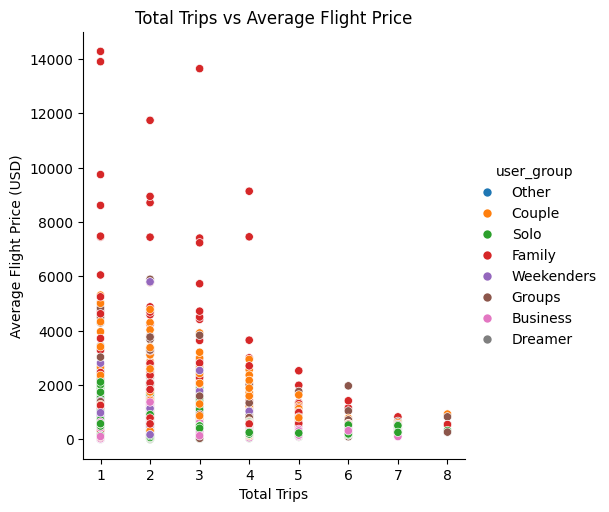

In [ ]:
# Scatter plot
sns.relplot(
    data=user_table,
    x='',
    y='avg_flight_price_usd',
    hue='user_group'
)
plt.title('Total Trips vs Average Flight Price')
plt.xlabel('Total Trips')
plt.ylabel('Average Flight Price (USD)')
plt.show()

In [ ]:
#Export to CSV
user_table.to_csv('user_table_finished.csv')

# How do the usergroups behave?

# Clustering

In [ ]:
user_table.isna().sum()

age                                          0
gender                                       0
married                                      0
has_children                                 0
home_country                                 0
home_city                                    0
session_count                                0
avg_session_duration_minute                  0
avg_page_clicks                              0
total_trip                                   0
conversion_rate                              0
cancellation_proportion                      0
weekend_trip_proportion                    461
avg_booking_departure_gap_days_flights     826
avg_booking_departure_gap_days_hotels      997
total_flights_booked                         0
return_trips_proportion                    826
avg_flight_price_usd                       826
avg_flight_discount_amount                1328
avg_flight_seats                           826
avg_checked_bag                            826
avg_distance_

In [ ]:
user_table.describe()

,age,session_count,avg_session_duration_minute,avg_page_clicks,total_trip,conversion_rate,cancellation_proportion,weekend_trip_proportion,avg_booking_departure_gap_days_flights,avg_booking_departure_gap_days_hotels,...,avg_checked_bag,avg_distance_flown_km,airlines_used,total_hotels_booked,avg_hotel_rooms,avg_stay_duration_day,avg_hotel_price_usd,avg_hotel_discount_amount,discounted_flight_proportion,discounted_hotel_proportion
count,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5537.000000,5172.000000,5001.000000,...,5172.000000,5172.000000,5998.000000,5998.000000,5393.000000,5393.000000,5393.000000,4006.000000,5998.000000,5998.000000
mean,41.306936,8.186729,2.014862,17.561232,2.666556,0.338449,0.012339,0.234587,20.029299,16.433142,...,0.600149,2352.013458,2.361287,2.469490,178.007497,3.780189,178.007497,0.111669,0.180667,0.138420
std,12.049824,0.479853,0.779059,8.730814,1.515586,0.191365,0.037772,0.283222,46.246814,38.803294,...,0.511766,1693.079511,1.557957,1.492682,84.522396,2.968888,84.522396,0.054403,0.134160,0.121824
min,17.000000,5.000000,0.492857,4.125000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,27.440590,0.000000,0.000000,24.000000,0.000000,24.000000,0.050000,0.000000,0.000000
25%,34.000000,8.000000,1.504960,12.444444,2.000000,0.222222,0.000000,0.000000,6.000000,6.000000,...,0.250000,1478.649349,1.000000,1.000000,123.500000,2.000000,123.500000,0.075000,0.111111,0.000000
50%,42.000000,8.000000,1.890608,15.612500,3.000000,0.375000,0.000000,0.166667,7.000000,7.000000,...,0.500000,2029.627849,2.000000,2.000000,163.000000,3.000000,163.000000,0.100000,0.125000,0.125000
75%,49.000000,8.000000,2.353720,19.625000,4.000000,0.500000,0.000000,0.400000,8.400000,8.333333,...,1.000000,2743.060269,3.000000,3.000000,212.333333,5.000000,212.333333,0.150000,0.250000,0.250000
max,88.000000,12.000000,12.208333,109.125000,8.000000,1.000000,0.250000,1.000000,365.000000,357.000000,...,5.666667,15935.681886,9.000000,9.000000,1063.000000,30.000000,1063.000000,0.450000,0.750000,0.750000


In [ ]:
user_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5998 entries, 23557 to 844489
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age                                     5998 non-null   float64
 1   gender                                  5998 non-null   object 
 2   married                                 5998 non-null   bool   
 3   has_children                            5998 non-null   bool   
 4   home_country                            5998 non-null   object 
 5   home_city                               5998 non-null   object 
 6   session_count                           5998 non-null   int64  
 7   avg_session_duration_minute             5998 non-null   float64
 8   avg_page_clicks                         5998 non-null   float64
 9   total_trip                              5998 non-null   int64  
 10  conversion_rate                         5998 non-null   flo

In [ ]:
# only keep numerical columns
user_numerical_columns = user_table.select_dtypes(include=[np.number])

In [ ]:
user_numerical_columns

,age,session_count,avg_session_duration_minute,avg_page_clicks,total_trip,conversion_rate,cancellation_proportion,weekend_trip_proportion,avg_booking_departure_gap_days_flights,avg_booking_departure_gap_days_hotels,...,avg_checked_bag,avg_distance_flown_km,airlines_used,total_hotels_booked,avg_hotel_rooms,avg_stay_duration_day,avg_hotel_price_usd,avg_hotel_discount_amount,discounted_flight_proportion,discounted_hotel_proportion
user_id,,,,,,,,,,,,,,,,,,,,,
23557,65.0,8,0.730000,10.250,2,0.250,0.000,0.000000,NaN,NaN,...,NaN,NaN,0,2,177.000000,10.0,177.000000,0.175,0.000,0.250
94883,51.0,8,1.257143,9.125,2,0.250,0.000,0.500000,6.50,6.500000,...,0.500000,1453.668135,2,2,90.000000,0.5,90.000000,0.100,0.000,0.125
101486,51.0,8,2.276190,16.375,2,0.250,0.000,0.500000,9.00,9.000000,...,0.000000,965.341901,1,2,198.500000,4.0,198.500000,NaN,0.250,0.000
101961,43.0,8,1.962500,15.750,5,0.625,0.000,0.200000,5.60,5.600000,...,0.400000,1321.686008,5,5,136.000000,3.8,136.000000,0.100,0.250,0.125
106907,45.0,8,3.127778,30.000,1,0.250,0.125,0.000000,198.50,198.500000,...,5.000000,13402.341589,2,2,129.000000,11.0,129.000000,NaN,0.125,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792549,45.0,8,1.780556,14.250,4,0.500,0.000,0.250000,4.75,7.000000,...,0.500000,1437.967206,4,1,36.000000,4.0,36.000000,NaN,0.125,0.000
796032,51.0,8,1.519048,18.500,3,0.500,0.125,0.000000,83.75,55.333333,...,1.250000,4289.605817,4,3,197.000000,3.5,197.000000,NaN,0.250,0.125
801660,54.0,8,1.559524,14.375,3,0.375,0.000,0.333333,6.00,6.000000,...,0.333333,721.128115,3,3,145.333333,2.0,145.333333,NaN,0.375,0.000


In [ ]:
'''
# Set up the figure and axes
fig, axes = plt.subplots(len(user_numerical_columns), 2, figsize=(15,
4 * len(user_numerical_columns)))

for i, col in enumerate(user_numerical_columns):
    # Compute the outlier bounds: I commented out the lower_bound
    # as in all the columns it's out of the range
    #lower_bound = cohort_users[col].mean() - 5 * cohort_users[col].std()
    upper_bound = user_table[col].mean() + 5 * user_table[col].std()
    mean = user_table[col].mean()

    # Plot histogram
    bins = int(np.log2(len(user_table[col])) + 1)  # Sturges' formula
    sns.histplot(user_table[col], ax=axes[i, 0], bins=bins, kde=True,
 edgecolor='black')
    axes[i, 0].set_title(f'Histogram of {col}')
    #axes[i, 0].axvline(lower_bound,color='r',linestyle='--',label=f'-5*STD')
    axes[i, 0].axvline(upper_bound,color='r', linestyle='--',label=f'5*STD')
    axes[i, 0].axvline(mean, color='b', linestyle='--', label='Mean')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].legend()

    # Plot box plot
    sns.boxplot(x=user_table[col], ax=axes[i, 1], showfliers=True,
boxprops=dict(alpha=0.7))
    axes[i, 1].axvline(upper_bound,color='r',linestyle='--',label=f'5*STD')
    axes[i, 1].set_title(f'Boxplot of {col}')
    axes[i, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Initialize a mask with all True values
mask = pd.Series([True] * len(user_table))

for col in user_numerical_columns:
    mean_value = user_table[col].mean()
    std_value = user_table[col].std()
    lower_bound = mean_value - 4 * std_value
    upper_bound = mean_value + 4 * std_value

# Update the mask for this column
column_mask = (user_table[col] >= lower_bound) & (user_table[col] <= upper_bound)
mask &= column_mask

# Filter the data using the combined mask

user_table = user_table[mask]

# we had 5998 records
number_of_outliers = 5998 - user_table.shape[0]
percentage = round(number_of_outliers/5998 * 100,2)
print(f'{number_of_outliers} ({percentage}%) records were outliers!')
'''

"\n# Set up the figure and axes\nfig, axes = plt.subplots(len(user_numerical_columns), 2, figsize=(15, \n4 * len(user_numerical_columns)))\n\nfor i, col in enumerate(user_numerical_columns):\n    # Compute the outlier bounds: I commented out the lower_bound \n    # as in all the columns it's out of the range\n    #lower_bound = cohort_users[col].mean() - 5 * cohort_users[col].std()\n    upper_bound = user_table[col].mean() + 5 * user_table[col].std()\n    mean = user_table[col].mean()\n    \n    # Plot histogram\n    bins = int(np.log2(len(user_table[col])) + 1)  # Sturges' formula\n    sns.histplot(user_table[col], ax=axes[i, 0], bins=bins, kde=True,\n edgecolor='black')\n    axes[i, 0].set_title(f'Histogram of {col}')\n    #axes[i, 0].axvline(lower_bound,color='r',linestyle='--',label=f'-5*STD')\n    axes[i, 0].axvline(upper_bound,color='r', linestyle='--',label=f'5*STD')\n    axes[i, 0].axvline(mean, color='b', linestyle='--', label='Mean')\n    axes[i, 0].set_xlabel(col)\n    axes[

In [ ]:
# Calculate the Z-scores
z_scores = np.abs((user_table - user_table.mean()) / user_table.std())

print()

TypeError: Could not convert ['FFFFFFFFFFFFFFFFFFFFFFFFMFFFFOFFFFFMFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFMFFFFFFFFFFFMFFFFMFFFFMFFMFFFFFFFFFFFFFFFFFFFFFFFFFMFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFMFFFFFFMFFFFFMFFMFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFMFMFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFMFFFFFFFFMFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFMFFFFFFFFFFFFFFFFMFFFFFFMFFFFFFFMFMMFFFFFMFMFFFMFFFFFFFFFFFFFFFFFFFFFFFFMFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFMFFFMFFFFFFFMFFFFFFFFFFFFMFFFFFFFFFMFFFFFFFMFFFFMFFFFFFFFMFMFMFMFMFFFFMFFFFFFFFFFFMFFFFFFFFMFFFFFMFFFFFFFFFFFFFFMFFFMFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFMFFMFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFMMFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFMFFFFFFFFFFFFFFMFMFFFFFMMFFMFMFFFFFFFFFFFFMFFFMFFFFFFFMFMFFFFFFFMFFFFMFFFFFFFFMFMFFFFMFFFMFFFFMFMFMFMFFMFFFFFFFFMFFFFMFMMFFFFFFFMFFFMMFFFFFFFFMFFFFFFMFMFFMFFFFFMFMFFFMMFFFFFFMMFFFFFFFFFFMFFMFFFFFMFFFFFFFFFFMFFFFFFFFFFMFFFFFMFFFFFFFFMFFFFMFFFFFFFFFMMFFMFFFFFFFFFMFFFFFFFMFMMFFFFFFFFFMFFFFFFMFFFFFFFFFFFMFFMFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFMFFFFFMFMFMFFFFFFFFFFFFFFFMFFFFFFFFFMFFFFFFFFFFFFFFFFFFFMFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFMFFFFFFFMFFFFFMFFMFFFMFMFFFFMMFFFFFFFFMFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFMFFFFFFFFFMFFMFFFFMFFFFFFFFFFFFFFFFFFMFMFFMFFFFFFFFFMMFFFMFFMFFFFFFFFFFFFFFFFMFFFFFFFFFFMFFFFFFFFFFFMFFMFFFFFOFFMFMFFFFFFMFMFFFFFFFFFFMMFMFFFFFFFFFMFMFFFFFFFFFFFMFFFFFFFMFFFFMFFFFFFFFMFMMFFFFFFMFFFFFFMMFFFFFFFFMFFFFFFFFFFMFFFFFFFMFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFMFFMFFMFFFFFFFFFFFFFFFFFFFFMFFFFFFMFFFFFFFFFFFFFFFFFFFMFMFFFFFFFMFMFFFFFFFFFFFMMMFMMFFMFFMFFFFFFFFFFFMOFFFFFFFFFFFFFFMFFFFMFFFFFFFFFFFFFFFFMFFFMFFFFFFFFFFFMFFFMFFFFFFFFFFFFFMFFFFFFFFFFFFMFFFMFFFFOFFFFFMFFFFFFFFFMFFFFFMMFMFFFFFFFFFFFFFFFFFFFFFFFFFMFFFMMFFMFMFFFFMFFFMFFFFFFMMFFFFFFFFMFFFFMFFFMFFFFFFFFFFFMFMMMMFFMFFFFFFMFFFFFFFFFFFMFFFFFMFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFMFFFMMFFFMFMFFFFFFFFFFFFFFFFMFMFFFFMFFFFFFFFFFFFFFMFMMFFFFFFFFFFMFFFFFFFFFFMFFFFFFFMFFFFFFMFFMFFFFFFFFFFFMFFFFFFFFFFFFFFFFMFMMFFMMFMFFFFFFFFFFFFFFFFMFFMFFFFFFFFFFFFFMFFFMFMFFMFFFFFFMFFMFMFFFFFFFFFFFFFMFFFFMFFMFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFMFFMFFFFFFMMFFFFFFFFFFFFFMFFMFMFFFFFMFFFFFFFFFFMFFMFFFFFMMFMMFFFFFFFMFFFFFFMFFFFMFFFFFMFMFFFFFFFMFFMFFFFFMFFFFFFFMFFFFFFFMFFFFFFFFFFMFFFFFFFFFFFFFFFFFOFFMFFMFFFMFFFMFMFFFFFFFMFFFFFMFFFFFFFMFFFFFFFFFFFFFMMFFFFFFFMMFFFFMMFMFFFMFFMFFFFFFFMFFFFFFFFFFMFFFFMFFFFFMMMMFFFFFFFFFFMFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFMFFFFFMFFFFFFFFFFFFFFFFMMFFFFFMFFFFFFFFFFMFMFFFFFFMFFMFFFFFMFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFMFMFFFFFFFFFFFFFFFFFFMFFMFFFFFFFMFFMFFFFFFFFFFFFFFFFFFFFMFFFFFMFFFFFFFFFMFMFFFMMFFFFMMFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFMFFFFFFFFMFMFFFFMFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFMFFMFFFFFFFMMFFFFFFFFFFFFFMFFFFMFFFFFFFFFMFFMFFOMFFFFFFFFFFOFFFFFFMFFFFFFFFFFFFFFFFMMFFFFFMFFFFFFFFFMFFFMMFFMFFFFFFFFFFFFFFFFMFFFFFMFFFFMFFFFFFFMFFFFFFMFFFFFMMFFMFMMFFFFFFFFFFMFFFFFFFFFFMFFFFFFFFFFFFMFFFFFMFFFFFFFMFFFFFFFFFMFMFFFFFFMFFFFFFFFFFFFFFFMFMFFFFMFFFFFFFFFFFFFFFFFFFFFFFFMFFMFFFFFFFFFFFFFFFMFMMFFFFFFFMFFFFFFFFMFFFFFFMFFFMFFFFFFMFFFFFFFFFFFMFFFFFFFFFMMFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFMMFFMFFFMFFFFMFMFFFMMFMMFFFFFFFMFFFFMFFFMFMMFFFFFFFFMFFFFFFFFMFMFFFFFFMFMFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFMFFFMFFFFFFFFMFFFFFFFFFFFFFMMFFFFFFFFFFFFFFMFFFFFFFFFFMFFMMFFFFFFFFFFFMFFFFFFFFMFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFMFFFFFFMFFFFFFFFMFFFFFFFFFFFFFFFFMFFMMFFFFFFFFFFFFFFMFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFMFFFFFMFFMFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFMFFFFFFFFFFFFFMFFFFFMFFMFFFFFFMFFMFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFMFFFFFFFFMMFFFFFFFFFFFMFMFFFFFFMFFFFFMFFFFFFFFMFFFMFFFMFFFFMFFFFFFFFFFFFFFFFFMFFMFFMFFFFFFFOFFFFMMFFMFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFMMFFMFFFFFFFFFFFFFFFFFFFMFFFMFMFFFMFFFFMFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFMFFFFFFFMFFFFFFMFFFFFFFFFFFFFMMFMFMFFFFFFMFFFFFFFFFFFFFFFFFFFMFMFFFMFFFMFFFMFFFFFFMFFFFFFFFFFFFMFFFFFFFFMFFFFMFFMFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFMFFFMFFFFFFFFFFFMFFFFFMFFFFFFFFFFFFFFFMFMFFFFFFFFFFFFFFMMFMFFFFMMFFFFFMFFFMMFFFFFFFFFFFFFFFFFFMFMFFFFMFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFMFFFFFFFFMFFMFFFFFFFFFFMFFFFFFFFFFFFFFFFFMFMFFFFFMFFFFFFFFFFFMFFFFFFFMFFFFFFFFFMFFFFFMFFFFFFFMFFFFFFFMFFFFFFMFFFFFFFFFFFFFFFFFFMFFFFFFFFFMFFFFFFFFFFFFFFFFMFFFMFMFFMFFFFFFFFFFFMFFFFFFFFFFFFFFFFFMFFFFMFFFMMFFMFFFFFFFFFFFFFFFFFMFFFFMFFFMFFFFFFFFFFFFFMFFFFFFFFFMFFFFFFFFFMFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFMFFFFFFFFFFFFFFFMFFFFFFFFMFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFMFOFMFFFFFFFFMFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFMFFFFFFFMFFFFFFFFFFFFFFFFFMFFFMFFFFFMFFMFMFFFFFMFFFFMFFFFFFFFMFFMFFMMFFMFFFFFFFFFFFFFMFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFMFFFFMFFFFFFFFFFMFFFFFFFFFFFMMFFFFFFFFFFFFFFOFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFMFFFFFFMFFFFFFFFFFFFFFFMFFMMFFFFFFFFFFFFFFFFFFFFMFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFOFFMFFFFFFFFMFMFFFFFFMFFFFFFMFFMFFMFMFFFFFMFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFMFMFFFFMFFFFFFFFFFFFFMFFFFFFMFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFMFFFFFFFFMFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFMFFFFFFFFFFFFFMFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFMFMFFFMFMFFFFFMFFFFMFMFFFFFFMFFFFFFFFFFFMFFFFFFFFFFFMFFFFFFFFMFFFFFFFFFFMFFFFFFFFFFFFFMFFFFMFFMFFFFFFFMFFFFFFFFFFFFFFFFMFFFFMFFFFFFFFFFFFFFFFFMFFFFMFFFFFFFFFMFFFFFMFFMFFFMMFFFFFFFFFFFFFMMFFMFFFFFFFFFFFMFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFMFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFMFFFFFFFFFFFFFFMMFFFFFFFFFMFFMFFFFMFFMFFFFFFFFFFFFFFFFFFFFMFFFMFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFMFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFMFFFFFMFFFFFMFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFMFFFMFFMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFMFFFFFFFFFFFFFFFFFFFFFFFFFFM'
 'usausausausausausausausausausausacanadausausausausausausausausausausausausacanadausacanadausausausausausacanadausausausausausausausacanadausausausausausausausausausausausausausausacanadausausausausausausacanadausausausausausausacanadausausausausausausausausausacanadausacanadausacanadausacanadausausausausausausausausausausausausausacanadausausausausausausausausausacanadausausausausausacanadausausacanadausausausausausausausausacanadacanadausausacanadausausacanadausausausausausausausausausausacanadacanadausausausacanadacanadausausausausausausausausausausausacanadausausacanadausacanadausausausausausacanadausausausausausausacanadausausacanadausausausausausausausausausausausausausausausausausausacanadacanadausausausausausausausausacanadausausausausausausausausausausausausausausacanadacanadausausausausausausausacanadacanadausausausausausausausacanadausausausacanadausacanadacanadausacanadausausacanadausausacanadausausacanadausacanadausausausausausausausausausausausacanadausausausausausausausausausausausausausausausacanadausausausausausausausausausausacanadausausausacanadausacanadausausausausacanadausausacanadausacanadausausacanadausausausausausausacanadausausausausausausausausausausausacanadacanadausausausausausausausausausausausausausausausausausausausacanadacanadausacanadausausausausausausausausausacanadausacanadausausausausausausausausausausausausacanadausacanadacanadausacanadausausausausausacanadausausausausausausausausacanadausausausausausausausausacanadacanadausausausausausausausausausacanadausausausausausacanadausausausausausausausausacanadausausausausausacanadacanadacanadausausausausausausacanadausausausausausausausausausausausausacanadacanadacanadausausausacanadausausausausausausausausacanadausacanadausausausausacanadausausacanadausausacanadausausausacanadacanadacanadausacanadausausacanadausausausausausacanadausausausausausausacanadausausausausausausausausausausausausausausausausausausausacanadausausausausacanadausacanadausausausacanadausausausausausausausausausausausacanadacanadausausausausausausacanadacanadausausausausacanadacanadausausausausausausausausausausausacanadausausausausausausausacanadausausausausausausausausausacanadausausacanadacanadausausausausausausacanadacanadausausausausausausausacanadausacanadausausausacanadausacanadacanadausausausausausacanadausacanadacanadacanadausausausausausausausausausausacanadausacanadausausacanadacanadausacanadausausacanadausausausausacanadausacanadausausausausausacanadausausausacanadacanadacanadausausausausausausausausacanadausacanadausausausausausausausausausausausausausausausausausausausausausausausausausausausacanadausausacanadausacanadausausausausacanadausausausausausausausausausacanadausausausausausausausacanadausausausausacanadausausausausausausacanadausausausacanadausausausausausausacanadausausausacanadausausausausacanadausausausausausausacanadausausausausacanadacanadausausausausausausausausausacanadausausausacanadausausausausausausausausausausausacanadausacanadausacanadacanadausausausausausausausausausausausausausausausausausausausacanadausacanadausausausausausausausausausausausausausausausausausausausausausausausacanadausausausausausausausausausausausausausausacanadausausausausausausausacanadacanadausausausausausausacanadausacanadausausausacanadausausacanadausausacanadausausausausausausacanadausausausacanadacanadausausausausausacanadausausausausausausausacanadausausausausausausausacanadacanadacanadausacanadausausausausausacanadausausausacanadausausausausausausausausacanadacanadausausausausausausausausausausacanadausausausausausausacanadausacanadacanadausausausausausausausacanadausausausausausausacanadausausausacanadausacanadausausacanadacanadausausausausausausausausausausausacanadausausausausausausausausausausausausacanadausacanadacanadausacanadausausacanadausacanadausausausausausausausausausausausausausausausausausausausacanadausausausausausausausausausausausausacanadausausausausausausausausacanadausausausausacanadausausacanadausausausausausausausacanadausausausausausausausausacanadacanadausausausacanadausausausausausausacanadausausausausausausausacanadausausausausausausausausacanadausacanadausausausausausausausausausausausausausausausausausausausausausausausausausausacanadausausausausacanadausausausausausausausacanadausausausausausausausausausausausausausausausausacanadausausausausausacanadausausausacanadausacanadausausausausausausausacanadausausausausausausausacanadacanadausausausausacanadausacanadausausausausausausausacanadausausausausausausausausausacanadausausacanadacanadacanadausacanadausausausausausausacanadausausausausausausacanadausausausausausausacanadausausausausausausausausausausausausausausausausausacanadacanadausausausausausausausausausausacanadacanadausausausausausausausacanadausacanadausausausausausausausacanadacanadausausausausausacanadacanadausausausausausausausausacanadausausausausacanadausausausausausausausausausausausausausacanadausausausausausausausausausausausausausausacanadausausausausausausausausausausausausausausausausausausausausausacanadausausacanadausausacanadausausacanadausausausausausausausausausausausausacanadausausausausausausausacanadausausausausausausausausausausausausausausausausausausausausausausausausausausacanadausausausacanadausausausacanadausausausausausausausausausausacanadausausacanadausausausausausausausausacanadausausausausausausacanadacanadausausausausausausausausausausacanadausausausausausausausausausausausacanadausausausausacanadausausausacanadausausausausausausausausausacanadausausausausausausacanadausausausausausausausausausausausacanadausausacanadausausacanadausausausausausausausausausausausausausausacanadausacanadausausausausausausausacanadausausausacanadausausausausausausausausausausacanadausausacanadausausausausausausausausausausausausausausausausausausausausausausausausausausausausacanadausausausausausausacanadacanadausausausausausausausausausausausacanadausacanadausausausausausausausausacanadausausausausausausausausausausacanadacanadausacanadausausausausausausausausausausausausausausausacanadausausausausausausausausausausausausausausausausausausausausausausausacanadausausausausausausausausausausausausausausausausausausausausausacanadausausausausausausausacanadausausausausausausausausausausausacanadausausausausausausausausausacanadausausausausausausausausausausausausacanadausausausausausausausausausausausausausausausausausausausausausausacanadausacanadausausacanadausausausacanadausausausacanadausausausausausausausausacanadausausacanadacanadausausausausausacanadausausacanadausausausausausausausausausausausausausausacanadausausausausausausausausacanadausacanadausausausausausausacanadausausausacanadausausausausausausausausausausausausausausacanadacanadausausausausausausausausausausausausausausausausausausausacanadausausausacanadausausausausausausausausausacanadausausausausausausausausausausausacanadausausacanadausausausausausausacanadausausacanadausausausausausausausausausacanadausacanadausausausausacanadacanadausausausacanadausausausausausausausausausausausausausacanadausausausausausausausausausausausausausacanadacanadausausacanadausacanadausausausausausausausausacanadausausausausausausausacanadausausacanadausausausacanadacanadacanadausausausacanadausausausausausausacanadausacanadausausausausausacanadausausausausausausausausausausausacanadausausausausausausacanadausausacanadacanadausacanadausausausausausacanadausausausausausausausausausausausausausausausausausausausacanadausausausausausausausausausacanadausausausausausausacanadausausausacanadacanadausausausausacanadausausausausausausausausausacanadausausacanadausacanadausausausausausausausacanadausausausausausausacanadausausausausausausausausacanadausausausacanadausacanadausausausausausausausausausausacanadausacanadausausacanadausacanadausausacanadausausausausacanadausausausausacanadausacanadausausausausausausausacanadausacanadausausacanadausacanadausausausausausausausausausausausausausausausausacanadausausausausausausausacanadausausausausausausausausausausausacanadacanadacanadacanadausacanadausausausausacanadausausausausausausausacanadausausausausausausausausacanadausausausausausausausausausausausausausausausausausausacanadausausausacanadausausausausausausausausausausausausausacanadausausausausausausausausausausausausausausausausausausausacanadausausausausausausausausausausausausausausausausausausausausausacanadausausausausausausausausausausausacanadausacanadausausausausausausacanadausausausausausausausausausausausacanadausacanadausausausausacanadausausausausausausausausacanadacanadausausausacanadausausacanadacanadacanadausausausausausausacanadausausausausausausausausausausausausausausausacanadacanadausausacanadausausausausacanadausausausacanadausausacanadausausausausacanadausausausausacanadacanadausausausausausausausacanadausausausausausausausausausausausacanadausacanadausausausausausausausacanadausausausausausacanadausausausausacanadausausausausausacanadausausausausausausausausausacanadausausausacanadausausausausausausacanadausausacanadacanadausausausausausausacanadausausausacanadacanadausausausausausacanadausausausausacanadausausausausausausausausausausausausausausausausausausausacanadausausausausausausausausacanadausausacanadausausausausausausausacanadausacanadausausacanadausacanadausausausausausacanadausausausausausausausacanadausacanadausausausacanadausacanadacanadausausausausacanadacanadacanadausausausausausausausausausacanadausacanadausausausacanadausausausacanadacanadausausacanadausausausausausausausausacanadausausausacanadausausacanadausausausausacanadacanadausausausausausacanadausausausacanadacanadausausacanadausausausausacanadausausausausausausausausausausausausausausacanadausacanadausausacanadausausausausausacanadausausausausausausausausausausausausausausausausausausacanadausausausausausausausausausausausausacanadausacanadacanadausausacanadausausacanadausacanadausausausausausacanadausausausausacanadausausausausacanadacanadausausausausausausausausausausausausausausausausacanadausausausausausausacanadacanadacanadausausacanadausacanadausausausacanadausacanadacanadacanadausacanadausausausausausausausausausausausausausausausacanadausausausausausausacanadausausausacanadacanadausausausausacanadausausausausausausausausausausausausausausausausausausausausausausausausausausausacanadausausausausausausacanadausacanadausausausausausausacanadausausausausausausacanadacanadausausausausausausausacanadausausausausausausacanadausausacanadausausausausausausausausausausacanadausausausausacanadausausausausausausausausausausausausausausausausausausausausacanadausacanadacanadausausausausacanadausausacanadausausacanadausacanadausausacanadausausacanadausausausausausausausausausausacanadausacanadausausausausacanadacanadausausacanadausausausausausausausausausausausausausausausausausausausausacanadausacanadausausausausausausausausausacanadausausausausausausacanadacanadausausausausacanadausausausausausausausacanadausausausacanadacanadausausausausausausausausausausausausausausausacanadausausausacanadausausausausacanadausausacanadausausacanadausacanadausausausausausausausausacanadausausausausausausausausausacanadausausausausausausacanadausausausausausacanadausacanadausausacanadausausausausausausausausacanadausausausausausausausausausausausausausausausausausausausausausausausausausausacanadausausausausausausausausausausausausausausausacanadausausausausausausausausausausausausausausausacanadausausausausausacanadausausacanadausausausausausausausausausausausausausausausausausacanadausausausausausausausausausacanadausacanadacanadausausausausausausausausausausausausacanadausacanadausausausausausausausausacanadacanadausausausausacanadausausausausausausausausacanadausausausausausausausausausausacanadausausausausacanadausausausausausausacanadausausausausausausausausausacanadausausacanadacanadausausausacanadausausausausausausausacanadausausacanadausausausacanadausausausacanadacanadausausausausausausausausausausausausausausausausausausausausausausausausausausausacanadausacanadausausacanadacanadausausausausausausacanadausausausausausausausausausausausausausausausausacanadacanadausausausacanadacanadausausacanadacanadausausausacanadacanadacanadausausausausausausacanadausausausausausausausausausausausausausausacanadacanadacanadausausausausausausausausausausacanadausacanadacanadausacanadausausacanadausausausacanadausausacanadacanadausausacanadausacanadausausausacanadausausacanadausausausacanadausausacanadausausausausacanadausausausausausausausausausausausausausausausausausausausausausausausacanadausacanadausausausausausausausausausacanadausausacanadausausausausausausausacanadausausausausausausausausausausacanadacanadausausacanadausausausacanadausacanadausausausausausacanadausausausausausausausausausausausacanadausausacanadausausausausacanadausacanadausausacanadausausausausausausacanadausausausacanadacanadausausausacanadausausausausausausausausausausausausausausausausausausausausausausausausausacanadausausausausausausausausausausausacanadausausausausausausausausausacanadausausausausausausausausausausausausausausacanadacanadausausausausausausacanadausausausausausausausausausausausausausausausausausausausausausausausausausausausausausacanadausausausausausausausacanadausausausausausausausacanadausacanadausausausausausausausausausacanadausausacanadacanadausausacanadacanadausausausausausausausausausausausausacanadausausausacanadausausacanadausausausausausausacanadausausausausacanadausausausausacanadausausausausausausacanadacanadausausausausausausausacanadausacanadausausacanadausausausausausausausausausacanadausausausausausausacanadausausausausacanadausausausausausausausausausausausausausausausausacanadausausacanadausausausacanadausausausausausausausacanadacanadacanadausausacanadausacanadacanadausausausacanadausausausausacanadausacanadausausausausausausausausacanadausausausausacanadausacanadausausausausausausausausausausacanadacanadausausausausausausausausausacanadacanadausausausausausausausausausausausacanadacanadausausausausausausausausausausausausausausacanadausausausausausausausausausausausausacanadacanadausausacanadausacanadausausausausausausausausausacanadacanadausausausacanadacanadausausausausausausausausacanadacanadausacanadausausausacanadausausacanadausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausacanadausausausausausacanadacanadacanadausausausausacanadausausausausausausausausausausausausausacanadausacanadausausausausausausausausausausausausausausacanadausausacanadausausausausausausacanadacanadausacanadausausausausausausausausausausausausausausausausausausausacanadausausausacanadausacanadacanadacanadausausausausausausausausausausausausausacanadausausausacanadausausausausausausacanadacanadausausausacanadausacanadausausausausausausausausausacanadausausausausausausausausacanadacanadausausausausausausausausausausausausausausausausausausausausacanadausausausacanadausacanadausacanadausausausausausacanadacanadausausausausausacanadausausausacanadausausausausausausausausausausausacanadausacanadausacanadausausausausacanadausausausausausacanadacanadausausausausausausausausausacanadausacanadausausausausausausausausausausausausausacanadacanadacanadausausausausausausausausausausacanadausacanadausausausacanadausausausausausausausausausausausausausausausausausausausausausacanadausausausausausausausacanadausausausausausausausausausacanadausausacanadacanadausausacanadausausausacanadausausausausausausausausausacanadausausausausausausausausausausausausausausacanadausausausausausausausausausausacanadausausausausausausausausausausausausausausausausacanadausausausacanadausacanadausausausausausausausausausausausausausausausacanadausacanadacanadacanadausausacanadausausausausausausausacanadausausausausausacanadacanadausausausausausacanadausausausausacanadacanadausausausausausausausausausausausausausausausausacanadausausausausausausausacanadacanadausausacanadausausausausausausausausacanadacanadausausausausausausausausausausausausausausausausausacanadausausacanadausacanadacanadausausausausacanadacanadacanadacanadausausausausausausausausausausausausausausausausausausausausausausausacanadausausausausausausausausacanadausausacanadausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausacanadausausacanadausausausausausausausausacanadacanadausacanadausausausausausausausausausausausacanadausacanadausacanadausausacanadacanadausausausausausausacanadausausausacanadausacanadausausausausausausausausacanadausacanadausacanadausacanadausausausausausausausacanadausausausacanadausausausausausausausausausausausausausausacanadausausausacanadausausausausausausausausausausausausausausausausausausausausausausacanadausausausausausausausausausacanadausausausausausausausausacanadausausausausausausausausausausausausausausausausausausausausausausausacanadausausausausausausausausacanadausausacanadausausausausacanadausacanadacanadausausausausausausausausausausacanadausacanadausausausausausacanadausausausacanadacanadausausausacanadausacanadacanadausausausausausausacanadausausausausausausausacanadacanadausausausausausausausausacanadausausausausacanadausausausausausausausausausausacanadausausausausacanadausausausausausausausausausausausacanadausausausausacanadausacanadausausausausacanadausacanadacanadausausausausausausausacanadausausausausacanadausausausausausausausacanadausausausausausausausausacanadausausausausacanadausacanadausacanadausausausausacanadausausausausausausausausausausausausausacanadausausausacanadacanadausausausausacanadausausausausausausausausausausausausausausausausausacanadacanadausacanadausausausausacanadausausausausausacanadacanadausausausausausausausausacanadausacanadacanadacanadacanadausacanadacanadacanadausausacanadausausausausausausausausausausausausausausacanadausacanadausausacanadausausausausausacanadausausausausausacanadacanadausausacanadausausacanadacanadausausausacanadacanadacanadausausausausacanadausausausausausausausausausausacanadausausacanadausacanadausausacanadausausausausacanadausausausausausausacanadausausausausausacanadausausausausausacanadausausausausacanadacanadausausausacanadausacanadausausausausausausausausausausausacanadausausausacanadausausausacanadausausausausausausausausacanadacanadacanadausausacanadausausausausausacanadacanadausacanadausausausacanadausausausausacanadausausausausausausausausausausausausausausausausausausausausacanadausausacanadausausacanadacanadausausausausausausausausausausausausacanadausausausausausausausacanadausacanadacanadausacanadausausausausausausausausausacanadausausacanadacanadausausacanadausausausausausausausausausausacanadausausacanadacanadausausausacanadacanadausausacanadausausacanadausausausausausausacanadausacanadausausausausausausausausausausacanadausacanadausausausausausausausausausausausausausausausausausausausausausausacanadausausausausausausausausausausausausausausausausausausacanadausausausausausausacanadausausausausausacanadacanadacanadausausausausausacanadausausausausausausausausausausausausacanadacanadausausausausacanadacanadacanadausausacanadausausausausausausacanadausausausausausausausausausausausausausausacanadausausausausausausausausausausacanadausausausausausausausausausausausausausacanadausausausausausausausausausausausausacanadausausausausausausacanadacanadausacanadausausausausacanadacanadausausausacanadausausausacanadausausausacanadausausausausacanadausausausacanadausausausacanadacanadausausausausacanadausausacanadausausausausausausausausausausausausausausausausausausacanadausausausausausausausausausausausausausacanadausausausausausausausacanadacanadausausausausacanadacanadausausausausausausausacanadacanadacanadausacanadausausacanadausausausausausausausausacanadacanadausausausausausausausausausausausausausausausausausausausacanadausausausacanadausausacanadausacanadausausacanadausausausausausacanadacanadausausausausacanadausausacanadausausausausausacanadausacanadacanadausausausausausausausausausausausausausausausausausausausausacanadausausausausausausausausausacanadausausausausausausacanadausausausacanadausacanadacanadausausausausausausausacanadausausacanadausausausausausausausausausausausausausausausausausacanadacanadausausausausausausausacanadausausacanadacanadausausausacanadausacanadausausausausausausausacanadausacanadausacanadausacanadausacanadausausausausausausausausausausausausausacanadausausausausausacanadausausausausausausausausausausausausausausacanadausausausausausacanadausausausacanadausacanadacanadacanadausausausausausausausacanadausausacanadausausausausausacanadausausausausacanadausausausausausacanadausausausausausausausausacanadausausausausausausausacanadausausausacanadausausausausausacanadausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausacanadausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausausacanadausausausausausausausausacanadausausausausausausausausausacanadausacanadausausausausausausausausausausausausausausausausacanadausausausausacanadausacanadausausacanadausausausausausausausausausausausacanadausausausausausausausausausausausacanadacanadausausa'
 'new yorkkansas citytacomabostonmiamilos angelessanta anael pasoaustinbirminghamcolorado springstorontonew yorkkansas citytampaatlantagrand rapidshoustonhoustonphoenixlos angelesfort worthtallahasseechicagoottawakansas citytorontokansas citycincinnatilong beachlittle rockstocktonhalifaxwashingtonlos angelessan antoniostocktonburlingtoncolorado springsbirminghamottawachicagomiamibakersfieldaustinlouisvilledallashoustonnew yorklos angelesatlantaclevelandnew yorknew yorktulsawinnipegindianapolismobilesan diegosan diegodetroitoklahoma citylondonminneapolissanta anawashingtonsan franciscoel pasolas vegascalgarysan antoniocincinnatilincolnmilwaukeenew yorkdetroitprovidencetucsonamarilloottawasan diegomontrealnew yorkvictoriahoustonwinnipegcharlottelos angelesnew yorkcharlottewichitamilwaukeenew yorkdetroithoustonatlantaclevelandlong beachnew yorkmontrealnashvillesan joseoklahoma citynew yorklos angeleslouisvillesan antoniosan diegosan antoniohalifaxst. petersburglong beachnashvillemobilestocktonhamiltonamarillooaklandtorontotallahasseenew yorknew yorkfresnoanchoragelos angelesel pasosan josevancouverlondondallasfort worthtorontophoenixchicagoquebecomahasacramentomilwaukeesan diegonewarksan franciscoanchoragenew yorklaredophiladelphiahalifaxhamiltonchicagosacramentosan josecalgaryhamiltonnashvilleknoxvillephiladelphiaseattleportlandchicagonew yorknew yorkfort worthnew yorkdetroittorontofort worthportlandcalgarymemphiswinnipegwashingtonrichmondlittle rockcincinnatihoustonottawanew yorkoklahoma citytampaportlandnashvillelas vegashamiltonsan diegonorfolkvancouvernew yorksan diegotallahasseenew yorkmobilecincinnatimiamitacomades moinesseattledetroitmilwaukeesan antonioanchoragecolorado springsdetroitnew yorkindianapolismontrealtorontohoustontampanew orleanswashingtonmilwaukeelouisvilletucsonmadisonlondonnashvillenew orleansfort worthlos angelescharlotteoklahoma citynew yorksacramentonew yorktallahasseerichmondtulsafort worthwinston-salemtorontoottawasan antoniosan antoniowashingtonnew yorkhoustonnew yorkbostonottawacalgarychicagoseattlehonoluluseattlecincinnatiamarillodes moinestorontonew yorkhoustonsan diegotorontoriversidewinnipegcalgarycolumbusmontreallos angeleslubbockhalifaxcolorado springssan diegohalifaxclevelandtacomawinnipegphoenixmontrealfayettevillekansas cityst. louissan franciscoclevelandel pasolas vegasrochesterhoustonnew yorknew yorkvancouverlos angeleslouisvillenew yorktacomasan diegohoustonlos angelesnew yorksan antoniophoenixcolumbuscolorado springschicagoclevelandmontgomerymontrealoklahoma citytucsonfresnonew yorkst. petersburgwichitakansas cityst. louislaredobaltimorevictorianew yorkbostonhoustontorontocolumbusmontrealatlantast. louisdetroitphoenixquebeclos angelescolumbustorontorichmondcalgarylouisvillebostonvictoriabirminghamlos angelesnewarkel pasophoenixnew yorkmontreallouisvilleriversidelos angelessan diegorenonew yorknew yorkphiladelphiajacksonvillerichmonddallaswindsormontrealnew yorksan franciscolos angelesmobilenew yorknew yorklos angeleslouisvillehoustonlos angeleshoustonnashvillefort worthlos angelesphoenixlaredosanta anasacramentotucsontorontotorontonashvilletorontooaklandlos angeleskansas citylos angelesaustinnew yorkchicagochicagochicagoquebecel pasotorontoportlandindianapolisnew yorkmemphisjacksonvillecolumbusnew yorkmilwaukeesan antoniodetroitel pasosan joseedmontonamarilloedmontoncalgarydallasvancouverdetroitlos angelescolumbusorlandolouisvillemontrealakronnew yorksan diegosan diegonashvilleclevelanddallasdenverhalifaxnew yorkphoenixlos angelesnew yorkwichitast. petersburgbaltimoresan franciscotorontomontrealhonolulutulsasan joselos angelesphoenixlouisvilleanchoragecolumbussan antoniomontrealhoustonnew yorksan josedallasanchoragelondonoaklandlos angeleswichitahoustonportlandhoustonchicagonew yorktorontonew yorksan diegochicagodallasnew yorktorontohamiltonedmontonnew yorknew yorkoklahoma cityminneapolishoustonnew yorkmontrealfayettevillechicagonew yorkphoenixbrownsvillehoustonlas vegascolorado springslos angelesel pasoanchorageknoxvilletorontomontrealhalifaxlos angeleskansas citylos angelesvictoriamiaminew yorknew yorknew yorklouisvillelos angelessacramentowichitacalgaryphoenixottawalos angelesphoenixhoustonaustinmontrealseattlefresnoedmontonbaltimorenew yorkedmontonlos angelesnew yorkaustintorontovictoriamontrealhoustonquebecchicagosan antoniohamiltonnew yorksan diegonewarklos angelesnew yorkhamiltonfresnorichmondel pasoatlantaakrondetroittorontosanta anatampasan antoniobakersfieldriversidephiladelphialubbockcolumbuslincolnlas vegascharlottesan josenew yorknew yorkindianapoliscorpus christicolorado springsomahahoustonmontrealnew yorksacramentosan diegoomahahamiltonphoenixedmontonnew yorkmobilenew orleansmontrealtucsonlos angelesdallasbostonlas vegaslos angeleschicagonashvilledetroitsan antoniomiamihalifaxottawacolorado springswashingtonamarillohoustonmodestodallasquebecwinnipeghoustonlos angelesfresnotucsonedmontonedmontondallasfort worthsan franciscosan diegonew yorkbostonlos angelesseattlenew yorklouisvillefresnomontrealnew yorkdallasfresnosan josenashvillephoenixcorpus christitorontohoustonnew yorkbaltimoretucsonakronkansas citysan franciscofort worthnew yorklondonsacramentocolumbuswinnipegmontrealspokanebaltimoreindianapolisrichmondchicagonew yorkquebecwinnipegrenoamarillooaklanddallasamarillosan diegocorpus christivancouvercorpus christitorontocincinnatioklahoma cityprovidencetorontonew yorkottawacalgaryphiladelphianew yorkst. petersburgsan antoniochicagoottawaindianapolistorontowinnipegquebecrochesterbostonsan joselos angeleskansas cityrenolos angelescorpus christicolumbusfort worthmontrealnew yorksaskatoonbakersfieldnashvillegatineautorontonew yorktorontonew yorkbaltimoremontrealsan diegohonolulunew yorkoklahoma cityottawadallastorontonashvilleknoxvillelos angelesgrand rapidsriversidemontrealcharlottemontgomeryomahaedmontonedmontonhalifaxlos angeleslincolnnew yorklos angelescorpus christikansas citybrownsvillenew yorktorontosan antoniotorontolos angeleslincolnlos angelesmilwaukeeindianapolisnew yorklong beachrichmondphoenixphiladelphiacharlottelong beachomahaphoenixdallasmemphishoustonhoustonphiladelphiabostontampatucsonnew yorknew yorkdetroitbostonhoustonvancouversan franciscolos angelesmontreallos angelesmontrealnew yorkcharlottehoustonnew yorkvancouverphoenixdetroitriversidelincolnlos angelesdallastulsakansas citydetroitmontrealtulsalos angeleslouisvilleclevelandhoustonlubbockminneapolisedmontonnew yorkcolumbushonoluluwinston-salemtorontolos angelesnewarksacramentooaklandbaton rougedenvermontrealst. louisnew yorknashvillevictorialittle rocksan josenew yorkspokanefort worthnew yorkhalifaxsan antonionew yorklubbockcalgaryprovidencecincinnatihoustonnew yorkhalifaxlos angelesnorfolkburlingtonst. louischarlotteportlandottawalos angelesel pasophoenixsan antoniohamiltonhamiltontallahasseelos angelesmadisonatlantagrand rapidslos angeleslouisvillenewarkmodestomontrealnew yorknew yorksan antoniovancouvernew yorklos angeleslos angelesnew yorksan antonionew orleansnew yorkminneapoliskansas cityst. petersburgdallasedmontonseattletorontochicagowinnipegvancouveratlantadallastallahasseeoaklandrichmondsalt lake citybostontampaphiladelphiabaltimorenashvillesan franciscolubbocktampanew yorkseattlemilwaukeememphiscolorado springsedmontonlos angeleswinnipegmemphisbrownsvilleaustinrenoriversidemilwaukeephiladelphiadallasnew yorknew yorklos angeleslos angelesnorfolkcharlottemiamiknoxvillewinston-salembaltimoresan joselong beachtampatampalouisvillemontrealminneapolistulsaaustinsanta anadallasnew yorknew yorkbostongrand rapidsnew yorkoaklandanchoragenorfolklong beachmontrealcolorado springsnew orleansomahanewarkdallasseattlelas vegasmontrealottawamobilejacksonvillehoustonsan antoniohoustonnew yorktorontomobilemontrealtulsanew yorksanta anawindsorlas vegascolumbusedmontonnorfolkphoenixquebecdetroitoklahoma citywichitabostonbakersfieldsan franciscocalgarydallasoaklandcharlottetorontoottawamilwaukeekansas citystocktonjacksonvilleaustintorontolos angelesnewarknew yorknew yorklos angelesprovidencephoenixmontrealnew yorknew yorksan diegonew yorkst. petersburganchoragenewarktorontomontrealtorontocharlottemontrealdallassan antonionew yorknew yorknashvillemontrealdallaskansas citychicagolondonseattletallahasseest. petersburgtucsonchicagodes moinesindianapolismilwaukeemontrealquebecbostonsan diegonew yorkwichitanew yorkaustinnew yorktallahasseesalt lake cityphoenixottawacolorado springssan josenew yorklos angelesseattlephoenixcalgarynew yorkgatineaumontrealnew yorklos angelessan diegonew yorknashvilleorlandost. louismontreallos angeleslouisvillemilwaukeewashingtonchicagolos angeleshamiltonminneapoliscorpus christiwichitatorontobaltimoreottawafresnowichitatorontocalgarybrownsvillehonolulumiamifresnonashvillemilwaukeememphisjacksonvilledetroitbuffalonewport newsquebecsan franciscophoenixlong beachchicagolong beachriversidebakersfieldsan josedetroitlos angelesfort worthdallassaskatooncolumbuswinnipegtorontodetroitmontrealsan franciscolos angelesmontreallos angelessaskatoonnashvillesan antoniocolumbusfresnomiamibirminghammilwaukeenew yorklos angelessanta ananew yorknew yorksacramentolong beachphiladelphiasanta anafresnost. louisriversidecalgaryindianapolissacramentosan franciscosacramentotulsanew yorksan josejacksonvillecharlottecolumbusphiladelphiasacramentomontrealcharlottehoustonlas vegascolumbusatlantadenversan josecolumbushamiltonchicagonew yorklubbockbrownsvillelondonjacksonvilleseattleottawacolumbusnew yorkstocktonlincolnlouisvillemiamilos angelestorontoel pasohoustonoaklandlincolnlaredochicagolas vegascolumbuswinnipegmontrealnashvillest. petersburgatlantamontrealnew yorklittle rockomahabuffalosan antoniolas vegasvancouvernew yorknew yorkatlantalos angelesrichmondsan antoniolos angelesmontrealhoustonminneapolissan diegochicagomiamiphoenixtucsonlos angelestorontolos angelestorontolos angelesspokanenew yorkprovidencemilwaukeest. petersburgchicagosan josedetroitnew yorksacramentolos angelessan diegocharlottedallasphiladelphiasan diegoseattlemobileorlandonew yorkindianapoliskansas citynew yorkriversidephiladelphiatorontolas vegasdetroitseattlenew yorkcalgarycolumbusdallasnew yorkoklahoma citynew yorklubbocklos angelesmontrealakronchicagonew yorktacomamodestonew orleansburlingtonsan antoniomadisonsan diegosan diegolas vegasnew yorknew yorklouisvilleseattlehalifaxbostonlos angelesnew yorkwashingtonorlandotorontokansas cityatlantafresnotorontohonoluluwinnipegfort worthphoenixnashvillelouisvillelos angeleschicagomemphistorontotacomaindianapolischicagonew yorkel pasooklahoma citysan franciscolondonmontrealnewarkorlandophiladelphianew yorktorontotacomavancouvercolorado springsphoenixdallaslos angeleschicagonashvillelos angelesvictorianew yorknew yorkjacksonvillesan antonioportlandbakersfieldphoenixaustinportlandtorontominneapolisoaklandtorontomontrealmontrealoklahoma citywinnipegseattlelos angeleschicagobaltimorejacksonvillenew yorktorontolos angelesmodestosan josephiladelphiakansas citylubbockvancouverjacksonvillenew yorkchicagolos angelessan diegosacramentohamiltonmontgomeryhoustonlos angelesphoenixchicagochicagominneapolisakronwashingtonfort worthnashvillelos angelesdenvermilwaukeephoenixrochesterbostonottawahalifaxbaton rougelos angelesaustinsacramentoindianapolislong beachsacramentomilwaukeesan franciscofort worthcalgarysaskatoonchicagonew yorkchicagorenosan antonionew yorksanta analondondallastorontomobilechicagospokanelos angelesindianapolishonoluludes moinesmontrealtorontomodestohoustonnew yorknew yorknew yorktorontovictoriagrand rapidswinston-salemoklahoma cityphoenixnewport newshoustonlas vegasrichmondcalgarylos angelessan franciscoindianapolissan diegovancouveraustinlos angelesnew yorkcolumbustacomanew yorkakronlubbocktucsonlaredochicagonew yorknew yorkedmontonmilwaukeelas vegaschicagoindianapolisfort worthrenoanchorageindianapolisphoenixst. louisst. petersburgnew yorklos angelesdallasottawaanchoragesan franciscosan antoniosanta analos angeleshoustonchicagoriversidenew yorkbaltimoreindianapolisaustincharlottenewarkdenverdallasdenverbaton rougemadisonnew yorkphiladelphiavancouverphiladelphiaphiladelphiaedmontonbuffaloaustincalgarystocktontampavictoriaphoenixhonoluluomahafort worthlos angelesomahaomahadenverhoustondallassan franciscophoenixhalifaxsan diegoshreveportlas vegasmadisonkansas citydallasnew yorkwinnipegstocktonprovidencejacksonvillelas vegaslouisvillenew yorknew yorksalt lake cityphoenixsan antoniokansas citybaltimorebuffalonorfolkfresnolong beachnew yorknorfolkkansas citydenverlos angelesjacksonvillesan josewashingtonsan diegolas vegastorontofresnonew yorknew yorkgatineaumiamifresnonew yorkcalgaryjacksonvilledallascharlottesanta anacolumbuslos angelesphiladelphiakansas citycolumbusmontgomerycalgarylouisvillebostonedmontonsan antonioaustinnewarkorlandonew yorklos angelesshreveportriversidetorontost. petersburgnashvillest. petersburglincolncolumbusnashvillevancouversaskatoonnew yorksalt lake cityphoenixlos angelessan antoniokansas citysan diegohoustonphoenixlos angelestorontonew yorkdallaschicagotacomamemphischicagonew yorknew yorkhonolulumadisonlos angelesvancouvermilwaukeemilwaukeedenverbostonmontreallubbockst. louisphiladelphiamontrealphoenixnew yorkrochesteraustinnew yorkcincinnatimilwaukeesan francisconew yorkvancouvermemphisnew yorkdetroitsan josenew yorkcolumbusmontrealnorfolkmobilefort worthbostonrochesterdenverriversidelos angelesnew yorkhoustoncolorado springscalgarycincinnatilubbockmontrealnew yorknew yorkedmontonphoenixhoustonlong beachchicagoseattlejacksonvillechicagochicagocharlotteindianapolisphoenixmemphisnewarklos angeleswinnipegsalt lake citymontrealtulsaoklahoma citysan franciscowashingtonlos angelesindianapolisbostonmontreallos angeleslong beachlos angelestorontolos angelesphiladelphiachicagosan antoniosacramentoshreveportel pasonew yorkhoustonsan josequebecst. petersburgportlandvictoriaphoenixphiladelphiasan franciscotampasan antoniosan antoniohoustonnew yorkaustintampasanta anasan antoniosan antoniorichmondtucsonlos angelesportlandportlandmodestosan diegotucsonnew yorkphoenixphiladelphiaatlantafayettevillefort worthchicagohalifaxhoustonfresnonew yorklos angelesnashvilleindianapoliswindsorquebecsan franciscowichitaseattlenew yorklos angelesfayettevilleburlingtonclevelandsan franciscoriversidelaredoottawahoustonvictoriachicagobuffalonew yorklouisvillemilwaukeecolumbusatlantalas vegasedmontonbakersfieldbrownsvillelos angelesnew yorksan diegohoustonlas vegasspokanemiamitulsamontrealtorontohoustontorontoorlandonew yorknew yorkoaklandmemphisfort worthsan antoniolouisvillesalt lake citynew yorkphoenixomahaatlantanashvillenew yorkvictoriael pasosan josenew yorknew yorkaustindallasfresnoomahalos angeleshoustonbuffalomilwaukeenew yorknew yorkmontgomerybuffaloaustinclevelanddetroitmobilewinston-salemchicagonew yorkvancouvernew yorklong beachdenverlos angeleswashingtonlittle rockaustinrochesternashvillemilwaukeehoustonwinston-salemlincolntampanew yorkhonolulunew yorkbaton rougesacramentolaredonew yorkcalgarychicagojacksonvillebostonlong beachsan antonioaustingrand rapidsottawalouisvilleel pasosanta anakansas citymemphisnewarknew yorknew yorkcharlottesan antonionew yorkhamiltonchicagohoustonburlingtonlittle rocknew yorkknoxvilleknoxvilledallaschicagowinnipegchicagolos angelesbostonorlandowichitamemphisbakersfielddallasseattlesacramentoknoxvillecolumbushamiltonakronbaton rougesan josedetroitnashvilleclevelanddenvercharlottenew yorkchicagodetroitsan diegonew yorklos angelesindianapolissan franciscophiladelphianew yorkchicagonashvillenew yorkbakersfieldtorontolubbockmontrealnew yorksan franciscohalifaxnashvillenew yorkindianapoliscalgaryphiladelphiaomahalos angelestorontobostonnew yorkrichmondtulsajacksonvillehoustonbakersfieldsan antonioedmontonnew orleansphiladelphiatorontotorontoomahalos angelesnew yorksacramentonashvilleedmontoncorpus christiphiladelphiatorontochicagodes moineshoustondallaslouisvilledallasrenominneapolisnashvillenorfolklouisvilleoklahoma citybakersfieldanchorageedmontonbaltimorelittle rockmemphisnew yorkkansas citylouisvillesan antoniooaklandtorontosan antoniovancouvernew yorkstocktonsan diegonew yorkaustinwashingtonwinnipegfayettevillelos angelesjacksonvilleedmontonmiamibakersfieldsanta ananew yorkfresnochicagonew yorknew yorkchicagonew yorklas vegashoustonlincolnnew yorkvictoriavictoriahonoluluorlandonew yorkphoenixclevelandlos angelesnew yorkatlantaatlantamontgomerybirminghamportlandorlandocorpus christitucsonmiaminew yorksan franciscolincolnmontreallos angelesindianapolislos angelesottawarochesterseattlephoenixhoustonnew yorkhoustontucsonmilwaukeeclevelandmontrealhoustonnew yorkdenverchicagonew yorknew yorkhoustondenveraustinsan antonioseattletorontowinston-salembakersfieldsaskatoonlincolncharlottefort worthportlandbaltimorekansas cityottawanew yorkhoustonmontrealnew yorkmilwaukeesan diegosan franciscoriversideoklahoma citysan joselincolnsacramentomontrealknoxvilletorontolos angelesindianapolismemphisnew yorkedmontontorontonew yorkdenvernew yorkmontrealwichitaaustinsanta ananew yorktucsonlos angeleshoustonseattlehonolulunew yorksan antoniolong beachchicagomontrealrichmondnew yorknew yorkst. louisnew yorklas vegaschicagoportlandsan diegocolumbusnew yorkhoustonphoenixmontrealmontrealstocktoncolumbusottawasanta anahamiltonlos angelessan antoniolaredolos angeleschicagocorpus christilos angelesnew yorkottawachicagonew yorknew yorkbirminghamdallaslos angelesshreveportottawaphiladelphiasacramentocalgaryrochesterphoenixcorpus christiedmontoncalgarytorontojacksonvillechicagoel pasotorontowinston-salemsan franciscost. petersburghoustonchicagost. louisgatineauhoustoncalgarynew yorkanchorageseattlest. louishoustoncalgarystocktonwashingtonnorfolkmemphisjacksonvillehoustonnew yorkhoustonchicagoamarillomemphistorontolos angelesbirminghamlong beachcorpus christiphoenixsan diegoedmontontucsonlong beachtorontomontrealcincinnatihamiltonnew yorkportlandmiamidenvernew yorkedmontonbaltimoremiamioklahoma cityphoenixhoustonlos angelescharlottebirminghamnew yorklincolndetroitjacksonvillefort worthnew yorkminneapolisnew yorkmadisonaustinwinston-salemwindsorsan diegomontgomerysalt lake citynew yorkdenverchicagonew yorklubbockcolorado springsmontrealnew yorknew orleansoklahoma citytallahasseeoaklandwashingtonvictoriaorlandonewport newsmobiletorontovancouverbostonnashvillebirminghamcolorado springstorontoriversidecharlotteanchoragesan josetampawashingtonrichmonddallastallahasseeedmontonlittle rockseattlemontrealsan josecalgarykansas cityclevelandsan franciscomemphisnew yorkphiladelphiawashingtonmontrealbaltimorehonolululos angelesmiamides moinesst. petersburglondonnew orleansdallaschicagosan franciscoomahamadisonakronseattleottawaindianapolisnew yorkdallascalgarynewarkedmontonmiamiel pasoaustinlos angeleschicagolubbocknashvillejacksonvilleindianapolisdenvervictoriabrownsvillehamiltonlong beachhoustontorontonorfolkhalifaxtacomamemphistorontolas vegasfort worthdallasbostonwinnipegaustinbaltimoreaustinlos angelestorontonew orleanswinnipegdenversan antoniowichitanew yorksan franciscosan antonioclevelandhalifaxrichmondlondonportlandwinston-salemgatineauminneapolistorontonew orleanslong beachcharlottenew yorknew yorkmemphisindianapolismodestonew yorksan antoniowinston-salemwichitaomahasan diegosacramentowinston-salemhamiltonnashvillelaredolong beachlong beachnew yorksanta anasan josetorontosacramentocorpus christicolumbussan franciscocolumbusdenvernew yorkhoustonindianapolisomahatampacalgarytorontoedmontonwindsorsan antoniocalgarynew yorkmilwaukeemiamioaklandwinnipegfresnophoenixsan diegocincinnatirichmondcharlottephiladelphiahamiltonnew yorkbostonst. louiscorpus christihoustonnew yorkchicagonew yorkcalgarytulsariversidesan francisconew yorksan antoniosan franciscost. petersburgsan franciscoshreveportbaltimorehonoluluhoustonportlandnew yorkst. petersburgtucsonbostonnew yorksaskatoonmiaminashvillehoustoncalgaryphiladelphiahonoluluportlandnew yorkaustinfort worthtucsonnew orleansnew yorktucsonnewarkcolorado springsdallasottawasan antoniolos angelesnew yorksan antonionew yorkoaklandsacramentobaltimorerochesternewport newsnew yorksacramentohoustonnew yorknew yorklouisvillestocktonfayettevillecharlottemontrealhoustonsan josenew yorkdallasphiladelphialos angeleslos angeleslubbockphoenixdallaschicagodallasnew yorkclevelandjacksonvillephiladelphiahoustonsacramentonashvillewichitacincinnatiottawabakersfieldindianapolissan antoniodetroitburlingtonhoustontampasan antonioaustinportlandchicagowinnipegsan antoniowindsorsacramentosan antonionew yorkburlingtondes moinesoaklandquebecdetroitseattlemontgomeryseattletampasan franciscocharlottephoenixbakersfieldsan diegonew yorktorontodallashamiltonrenoshreveportmadisonnew yorkhalifaxsan franciscojacksonvillelas vegassan franciscoknoxvillenewarklubbockbaltimorelondonedmontonhoustonbirminghamseattlecalgarynew yorkindianapolistorontomontrealtorontohoustonamarillophoenixjacksonvilletacomaamarillovictoriahoustonnew yorksan josenew yorklos angelesnew yorksan franciscotampaphoenixcolumbussan franciscomiamiindianapolisnewarkdallascalgarytorontonew yorkbuffalohamiltonmadisonanchoragemontgomeryriversidecalgarynew yorksan antonionewport newsvancouversan antonionew yorktorontonew yorkdallastulsaminneapoliswinnipegbaton rougeaustinoaklandnew yorkottawacalgaryhonolulubirminghamlos angeleslas vegasoaklandtampacolumbusedmontonaustincolumbussan franciscosan franciscodetroitphoenixdenverlos angelescolumbusmiamiphiladelphiatorontochicagosaskatoonsan diegosan joseoaklandst. louisburlingtonsan antoniosan franciscocalgarychicagosan diegoatlantaoaklandnew yorktorontosan antoniosan francisconew yorkwashingtonmontrealdallasel pasokansas citynewarkphiladelphiamontrealomahaomahadenverwichitachicagodenversalt lake cityhoustonportlandwinnipegtulsalos angelesnewarkcalgaryprovidencekansas citymontgomerycolumbusmadisonportlandtorontolos angelesrenohalifaxtorontonew yorkspokanecorpus christidetroitnew yorkaustinlondonatlantasan antoniotulsavancouverwindsorphoenixsan antoniooklahoma citywashingtonnew yorktorontoseattlechicagonew yorkcharlotteedmontonnew yorklos angelesdenvernew yorkphoenixaustinseattlelos angelesdetroitorlandotucsoncorpus christiwinston-salemsan franciscolong beachwichitacolumbusaustinchicagoottawanew yorknew yorkwashingtonbaltimorechicagomadisonlos angeleslos angelesmontreallas vegasnew yorkwindsorindianapolismilwaukeeoklahoma citydallasbostontampael pasotorontolouisvillecalgaryhonolulumilwaukeeedmontonchicagoedmontonhoustonaustincorpus christisacramentolos angeleswindsorchicagonewport newsnew yorknashvillekansas citytucsonsan franciscowindsorhoustoncalgarynew yorkhoustonhoustonmontreallos angelessaskatoonvictoriajacksonvillestocktonmadisonmiamiquebecwindsorvancouvermilwaukeebaton rougeaustinlouisvilleomahatampadallassan josekansas cityedmontonlubbocktorontoindianapolistulsanew yorkwinnipegnashvillewashingtoncolorado springscalgarytorontooaklandbrownsvilletorontosan antonionew yorkrochesternew yorklos angeleslos angelesknoxvillebuffalowinnipegnew yorkbaton rougenashvilletorontomemphisnew yorkedmontonhoustontulsalos angelesomahacalgaryottawalincolnchicagocorpus christichicagocolumbuslondonatlantalos angeleskansas cityhamiltoncalgarynashvillelos angeleswindsorsan josenew yorklos angelesstocktonedmontonnew orleansnew yorkorlandodallasphoenixnew yorknew yorkindianapolisnew yorknew yorkaustinbostonhonoluluchicagoedmontonoaklandhalifaxnew yorknorfolktorontophiladelphiarochestermiamicolumbusminneapoliscalgaryst. louisorlandosacramentophiladelphiajacksonvilletucsonhoustonlubbockchicagobaltimorechicagoclevelandrenonew yorkoklahoma citybostonkansas cityphoenixcalgarymobileclevelandchicagowashingtonlong beachoaklandhoustonnew yorkindianapolisbostonminneapolisnew yorktorontonew yorkmontrealwindsorhonolulujacksonvillevancouverminneapolisdallasquebecjacksonvillelondonsan josechicagodenversan diegodetroitedmontonlos angelessan antoniomontgomeryel pasowinnipegnew yorkkansas citysan antonionew yorkmontrealottawaomahaatlantariversidenashvilleportlandtallahasseeportlandlong beachnew yorkbirminghamrochesternew yorkcolumbusoaklandphiladelphiahoustonmontrealbostonminneapolischicagolittle rockdes moinesspokanetorontomontrealottawasanta ananashvillecalgarydenvertorontonew yorkkansas citysan antoniolondonlos angelestorontohamiltoncalgaryoaklandcalgarylouisvillefort worthbostondallastucsonlos angelessan antonioportlandbirminghamlincolnsan diegonew yorkwashingtonfort worthmilwaukeemontrealbaltimorephiladelphiacincinnatijacksonvilleomahadallasmontrealphiladelphiaspokaneriversidetorontotorontonew yorkknoxvilletulsanew yorkmontrealshreveportel pasonorfolklos angelesst. louisst. petersburgnew yorkindianapolisriversidehoustonphoenixphiladelphiasan francisconew yorkmiamilos angelesindianapolisriversidetacomahoustonnew yorkdallasphiladelphialas vegasnew yorksan josenew yorkvancouverwichitabirminghamlos angelesnew yorknew yorkfort worthtorontophiladelphiatorontorichmondtulsacorpus christibostonsan antonionew yorkquebecnew yorkwinston-salemnew yorkindianapolisnew yorknew orleansmontrealcalgarylos angelesnew orleansphoenixnew yorkchicagolittle rockchicagovictorianew yorkphiladelphianew yorkfresnojacksonvillenew yorkvancouverseattlenew yorkwindsorhonolulucolumbusaustinchicagomiamiel pasophoenixlos angelesshreveportwashingtonmontrealbaltimoresan franciscomilwaukeelouisvilletorontonashvilleanchoragesan antoniophiladelphianashvillenew yorkburlingtonlos angelesnew yorkdenversan diegodetroitphoenixsan antoniocincinnatilos angelesnew yorkchicagonew yorkbostonlondonsan antoniocalgarywindsorsan franciscolos angelesbostonlos angelesmontrealnew yorkcincinnatitorontolubbocklos angelesottawalos angelesmontrealportlandbaton rougevictoriasan antoniolos angelesmontrealmadisonmilwaukeesan josememphisdetroitlos angelesakronhoustonlos angelesnew yorklondoncharlottemontrealsan diegoburlingtonlincolncharlotteedmontoncalgaryhonoluluorlandolondonportlandbuffalonew yorkdetroitnew yorkbostonlos angeleslos angelesbakersfieldwashingtonsan diegosan josehoustonaustinmodestosan diegolos angelescharlottecharlottebaton rougetorontomilwaukeetorontosan josesan antoniooaklandomahacharlottenew yorkchicagojacksonvillenewport newsottawadenvernashvillenew yorklubbocklong beachlong beachcalgarytorontolubbockminneapolislong beachsan josewinnipegel pasoburlingtonsan diegophiladelphiamontgomeryseattletulsalondonsan joseclevelandphoenixquebecgatineaucolumbusatlantadallasnew yorknew yorksan franciscosan diegoaustinclevelandwichitachicagonew yorkphoenixlas vegasnew yorkcalgarysan diegolos angelesphoenixgatineaulong beachnew yorknew yorkriversidewinnipegmobilecolumbusmontrealmilwaukeeseattletorontohoustonquebecsan diegobuffalomemphisseattlejacksonvillenewarklouisvillenew yorktorontowashingtonbakersfielddenverlubbockhonoluluomahast. louishoustonhoustonmontrealwichitalos angelesnew yorkportlandsan diegooklahoma citymontrealnew yorknew orleansseattlemodestolos angelestorontohoustonhamiltonphoenixhoustontorontoomahaphiladelphianew yorkseattlenew yorknew yorkportlandsan antoniogatineaubaton rougecolorado springsnew orleanshoustonsan franciscosan josemodestochicagodenveroklahoma citytulsatampasanta ananew yorknew yorkphoenixbirminghamknoxvillesanta anawichitanew orleansphoenixbakersfieldel pasowinston-salemdallasedmontonnew yorknew yorkoaklandminneapolisoklahoma citynew yorkcolumbusorlandonew yorkchicagohoustonsacramentolubbockchicagosan antonioedmontondallasnew yorkkansas citybakersfieldnew yorkphoenixcolorado springsanchoragehoustoncolumbuscolorado springsomahamemphisoaklandmobiletorontolouisvillechicagonew orleansdenveratlantaedmontonnew yorksanta anaottawawichitaphoenixlos angeleslos angelesdetroitaustinindianapolismilwaukeehoustonrenooklahoma citydetroitlittle rockhoustonlos angelessanta analubbockedmontonaustinomahast. petersburgcolumbusprovidencefayettevillechicagocolumbusjacksonvillevictoriafayettevillemontrealedmontonphiladelphiaomahafayettevilledes moinesrochesterphoenixlos angelesnewarknew yorknew yorknewport newshoustonwindsorcolorado springsgatineaunew yorksan joseomahawashingtonmilwaukeenew yorkbakersfieldnew yorksaskatoonwinnipegtucsonphoenixcharlottelos angelesottawaportlandlas vegashoustonel pasosan diegojacksonvillelos angelesnew yorkwinnipegdetroitlas vegasnew yorksan antoniosan joseshreveportstocktonhoustonnew yorkchicagomontrealnew yorkfayettevillenew yorklos angelesedmontonlos angeleskansas citybostonsan francisconew yorksan diegotorontoorlandosan antoniochicagonew yorklos angelesnew yorknew yorktampafayettevilletorontonew yorklos angelesmontrealtorontonew yorktucsonlos angeleswinnipegmobileknoxvilleoklahoma citymadisonlos angelesnew yorkst. louisgatineaulos angelesnew yorkcalgarysan antoniowashingtonnew yorkcalgarylittle rockphoenixcharlottelondonwinnipegbakersfieldlas vegasfort worthlos angelesseattlenewport newsrenocolorado springsprovidencelos angelesnew yorkhoustonsanta anasan franciscost. louisminneapoliswichitalos angelesdallassan antoniochicagonew yorkportlandcharlottelos angeleshoustontampaedmontonlong beachmontrealcorpus christidenvercalgarycalgaryakronclevelandlouisvillechicagodenvermemphistorontonew yorktulsaindianapolissacramentoanchoragenew yorkel pasohoustonlaredophiladelphiasacramentohoustonmilwaukeejacksonvillechicagoclevelandwinnipegquebecnew yorkchicagosan antoniotorontogatineaulos angeleslos angelestorontovictoriacolumbussan antoniosanta anaquebectorontomontrealjacksonvillelos angeleslos angelesst. louisnew yorknorfolkedmontonclevelandnashvillecorpus christilong beachnew orleanscolorado springsnew yorknew yorknew yorknashvillephoenixspokanerichmondphiladelphiahamiltonvancouverottawaminneapolisnew yorkst. louisdallassan franciscocolumbusnew yorklouisvillelas vegaslos angelesmontrealchicagomontrealmontrealnew yorkedmontonphiladelphiaknoxvillewinnipegdenverlos angeleslos angeleshalifaxlos angelesrichmondedmontonmontrealmemphisburlingtonmontrealmobilehalifaxfresnoriversidecorpus christicalgaryaustinindianapolisedmontonfayettevillelas vegasdallastorontonew yorkorlandowindsornew yorkjacksonvilletulsalas vegaswindsormontgomerymontgomerynew yorkportlandmobilephiladelphiasan josenew yorkcharlottetulsasan diegodallassan franciscoatlantajacksonvillesan antonionew yorknew yorkdetroitlaredodenvernew yorklos angeleslondonsan joseottawalos angelesnewport newstulsadallastulsalos angeleslos angelesaustinoaklandwinnipegportlanddenvervancouversan diegogrand rapidsoaklandaustinchicagost. louisshreveporttorontominneapolislos angelestallahasseebostonomahachicagosan antonioprovidencesan diegofort worthwinnipegedmontonsan antoniobaltimorevancouversan antonioclevelandwashingtonsaskatoonshreveportcalgaryfort worthfort worthomahahoustonwashingtonmontrealkansas citybakersfieldlas vegaslos angelesindianapolislos angelesoklahoma citylos angelessan diegosan josephoenixsaskatoonomaharenoottawanew yorklas vegasnew yorksan josemontrealnew orleanswinnipeglos angelesnew yorkvancouverst. petersburglos angelessan diegophiladelphiaaustinphoenixsaskatoonphiladelphiaphiladelphiadallasvictoriavancouvernashvillenew yorkomahacalgarynashvillenew yorknew yorkmemphisatlantaclevelandsan josenew yorkst. louisomaharichmondwashingtonbakersfieldmilwaukeenorfolkriversidememphisnashvillerochesterlos angeleslos angelesomahadenverbirminghamclevelandottawalos angeleslos angelesdallasnew yorkshreveportfort worthlos angelesnew yorkminneapoliswinston-salemomahamontrealoaklandtucsonsan antoniophoenixsan antoniosan joselos angelessan diegonew yorkgatineautucsontallahasseenew yorkmemphisbostonsan diegosan antonionewarksanta anast. louissanta anafort worthbostonnorfolkvancouvercalgarybaltimoresan antonioaustincolumbusnorfolkwichitatorontonew yorkakronphoenixwinston-salemphoenixnew yorkhoustondes moineslong beachnew yorkmemphislouisvillefort worthhoustondenverbaton rougehoustonportlandwinston-salemnew orleansjacksonvillebostonriversidesan diegonew yorkchicagooaklandomahades moinestorontoatlantanew orleansjacksonvillenew yorknew yorkel pasoatlantamontrealtulsastocktonmiaminashvilleaustinnew yorknew yorktorontofresnotorontobostonminneapolisjacksonvilleoklahoma cityhoustonclevelandmemphisdallasbirminghamquebeccolorado springssan franciscomontrealtorontoindianapolisfort worthedmontontorontosan antoniosalt lake citylos angelestulsadetroithoustonhoustoncolorado springsbakersfieldbaton rougelos angeleschicagoedmontondallaswinston-salemlong beachtorontolos angelesnewarkottawahoustonmemphisdallasnew yorkphoenixnew yorktorontophoenixnew yorklos angelesportlandhamiltonsalt lake citymilwaukeecolumbustulsawinnipeghoustondallaswashingtonlos angeleswichitalos angelestorontocalgaryst. louishoustonnew yorklos angelessan antonioseattlechicagotorontosan josetorontonew yorklos angelesvancouvernew yorkseattledes moinessan diegonew yorkdallaslouisvillelos angelesphiladelphiacalgarygrand rapidsburlingtondetroittucsonnew yorkshreveportmontrealnewport newssan josesacramentomemphislondonaustinomahadallasclevelandsan diegodenversan antoniodenverhoustonmemphissan diegonew yorkhoustonmemphishoustonlouisvilleottawanew yorknew yorkquebecphiladelphiawinston-salemlaredolondonhoustonorlandomemphisaustinorlandohoustonaustinmontrealcalgaryottawalos angelesnew yorkvancouversan antoniotorontomontrealchicagonew yorkcolumbusvictoriacolumbusrochesterchicagonew yorkedmontonshreveporttorontoatlantachicagoknoxvillemontgomerynew yorkorlandolos angelesdes moinesmontrealnew yorkriversidelos angelesdallastorontosan antoniotorontochicagohoustonsan antoniolubbocklos angeleslos angelesphiladelphialaredolos angelesindianapolismontrealcalgarykansas citycolumbusoklahoma citybostonsan diegosan josenashvillefresnonew yorktorontotorontomiamihoustonsan josebakersfieldfresnoel pasoel pasoomahanew yorkhoustonnew yorktorontotorontomodestolos angelesbaton rougeminneapolisnew yorkriversidesan diegobakersfieldlos angeleswashingtonnashvilleindianapoliscolumbuschicagocalgarybostonnew yorkspokaneclevelandlos angelesfort worthseattlesan diegolubbocklos angelesphiladelphiawashingtonwinnipegtorontosan antonioclevelandwinnipegseattlemontrealsan diegolaredonew orleanssacramentodallaschicagomilwaukeesan diegochicagotorontoquebechoustonlincolncharlottevictoriaedmontonnew yorksan joselos angelesnew yorkphiladelphianew yorklong beachnew yorkottawatorontochicagomontreallaredonew yorkminneapolisedmontonchicagooklahoma cityvancouverlas vegaswinston-salemnew yorkchicagoanchoragenew yorkmobilehoustonfort worthtacomadallasdallascolorado springsnew yorkphoenixoklahoma citychicagosan diegolittle rockchicagoanchorageoklahoma citylouisvillenew yorkbakersfieldsan josenew yorksan franciscolouisvillemiamichicagocorpus christihoustonclevelandmemphisnew yorktorontocolorado springslos angelesriversidenew yorkphoenixmontrealcalgaryquebecjacksonvilletulsariversidelos angeleswinnipegel pasonew yorkakrondenversan francisconew yorkhoustonnewarkfort worthsan diegosan diegoriversidewashingtonvancouversan josewinnipegmobiledallasprovidencechicagoportlandjacksonvilleminneapolismiamisacramentowichitalas vegasoklahoma citysan diegodallastorontobaltimoregrand rapidscalgaryrochestershreveportnew yorkomahaoaklandnew yorkhamiltonhamiltonfresnoedmontonfort worthnew yorkindianapolislas vegasaustinrenolos angeleshoustonfresnonew yorklos angelesdenvercharlottenew yorkmiamiindianapolisnew yorklong beachhoustonquebecstocktonchicagophiladelphiawinnipegnashvillevancouvercalgaryquebecphiladelphianew yorkel pasonew orleanscolorado springsmemphisorlandonew yorknew yorknew yorkchicagosan franciscolas vegashalifaxdallashoustonst. louishamiltonchicagofort worthanchorageaustinsan antonionewarkmontrealcalgarydallasprovidencenashvilletorontonashvilleedmontonphiladelphianew yorknew yorklos angelesnew yorkchicagosan antoniodallasbaltimoretorontomemphislong beachphoenixsan francisconew yorkshreveportrenolos angelesvancouveredmontonphoenixgrand rapidslos angelesel pasonew yorknew yorkphoenixlos angelesrichmondbirminghamnew yorkaustinsan diegonew yorkspokaneminneapolisportlandbostonchicagomobilecalgarysan antonionew yorkindianapolistorontonew yorkedmontonnew yorkottawadallasphiladelphialas vegasdallaschicagoottawahamiltoncorpus christitampawashingtonhoustonwichitamontrealchicagolos angelesnew yorkmontrealportlandsan antoniotacomanew yorksan josetucsonhonolulunew yorkchicagochicagolaredocalgarysan diegoottawawashingtontorontonew yorklos angeleshoustonphiladelphiawinnipegnashvillelaredosanta anasan josephoenixtorontomontrealnew yorkchicagosan josesan diegojacksonvillehoustonhoustonakronjacksonvillesaskatoontampacalgarynew yorklos angelesbaton rougenew yorksacramentotulsaburlingtonkansas citydallasnew orleansnew yorkdetroitlas vegasmontrealmontrealmontrealindianapoliswashingtondes moineswashingtonjacksonvillephiladelphiaphoenixlouisvillewashingtonchicagoottawafort worthtorontoportlandoklahoma citycharlotteottawanew yorkphiladelphiadallasakroncolumbusatlantatulsahoustonchicagotacomanew yorknashvillenew yorksan diegotucsonmiamiindianapolisnashvillehonoluluhoustonst. petersburglondonmemphisnewarkjacksonvillejacksonvillenew yorkmobilenashvilletorontosan diegosan antoniorichmondbaltimorenew yorknew yorkportlandnew yorkel pasowinnipegnew yorkwashingtontorontocalgarynew yorknew yorkottawaportlandmiamibaltimoregatineauhoustonfresnonew yorkphoenixcolumbusoklahoma cityrichmondaustinsan diegohalifaxnew yorkhoustonportlandportlandnew yorkphiladelphiasacramentonew yorklos angelesdallascharlottetucsontulsades moinesmontrealomahalos angelesseattlesan franciscohoustonorlandolos angelesmadisonhoustonel pasomontrealrichmondnewarkmontgomeryomahabostonoaklandchicagomadisonbakersfieldomahaportlandlos angelesfresnolos angelesmadisonnorfolkmontrealwichitakansas citylubbockwinnipegjacksonvilleottawahoustonstocktonnorfolknew yorkomahaphoenixnew yorksan antonioportlandnew yorknew orleanschicagolos angelessanta anaclevelandcalgarytacomaedmontonwinnipegtorontomadisonnew yorkedmontondallasomahawinston-salemel pasolos angelesclevelandoklahoma cityvancouverknoxvillecharlottephoenixlaredonew yorksaskatoonvancouverdenvermilwaukeesacramentotulsacolorado springstorontochicagotucsonhoustonnew yorkwinnipegtorontostocktonhoustoncolumbusphoenixnew orleansdallaslong beachlouisvillesan franciscochicagosan antoniorochesterindianapolishoustonindianapolislas vegastorontocolorado springsnew yorklas vegasorlandonew yorkwashingtonnew yorklondonwindsorsan diegolos angelesottawaoklahoma citynew yorklos angeleslaredosan diegophoenixoklahoma cityel pasotorontotorontowashingtonsanta anatallahasseecolorado springsoaklandlos angelesnew yorkdallassan josewashingtonkansas citychicagoriversidesacramentotulsanew yorkdallastorontocharlotteseattletorontotulsaedmontonhalifaxhoustonaustinnew yorkbaton rougetorontowinnipegtorontocalgarycincinnatisan antoniogrand rapidshoustonbaton rougenew yorkorlandochicagomemphisaustinminneapolischicagonew yorkchicagonew yorkindianapoliswichitanew yorktallahasseejacksonvilletucsonamarillolas vegasmontrealwashingtontacomahoustonmilwaukeesan antonionew yorkbaltimorenew yorktorontoaustinindianapoliswinnipegmadisonminneapolisnewport newssanta anajacksonvillechicagophoenixcolumbussan diegoel pasowichitahoustonlas vegasdenverriversidesan josechicagolouisvillebuffaloaustinoaklandphoenixlos angelesgrand rapidsnew yorkfresnolos angelesnew yorkel pasohoustonomahalondonlouisvillebaltimorecalgarynashvillenew yorksan diegotucsoncolumbushoustoncolorado springsmobileottawatorontobaton rougecalgarynew yorkbaltimorebaltimorenew yorknew yorktampaoklahoma citybaltimorelas vegascolorado springscorpus christitorontonew yorklondonsanta anawindsoraustinphiladelphiawinnipegtorontoel pasonew yorklos angelesdallastulsalas vegasquebecchicagosan josesan antoniohalifaxomahacalgarydenverlouisvillecharlottenew yorknew yorkkansas citysan antonioportlandedmontonrenotorontonew yorktorontost. petersburgvancouverdetroitlos angelesnew orleanstulsabaltimorenorfolknew yorkhalifaxbakersfieldindianapolisdenverottawabaltimoresan antoniotamparochesterbrownsvilleindianapolisdallaschicagoomahaanchoragenew yorkkansas citychicagostocktontorontomilwaukeesan antoniodetroittorontorenoomahalaredoclevelandchicagomiaminew yorkchicagostocktonminneapoliscolumbushonolulunew yorklos angelessan josecolumbusriversidelos angelesmontgomeryphiladelphiahoustonlos angelesottawasan josest. louistucsondetroitakronhonolulunewarknew yorklos angelescalgarymilwaukeechicagonew yorkhoustonrenowinston-salembrownsvillecharlottecalgarytallahasseetamparichmondnew yorkbrownsvilleshreveportel pasost. louisnew yorkmilwaukeelos angelessan diegooaklandlas vegastucsonfort worthlincolnlos angeleslos angelesphiladelphianew yorkel pasonew yorktorontonew yorknew yorkphoenixmilwaukeenew yorkwashingtonportlandhoustonmontreallubbocksan franciscohamiltondes moineslos angelesakronfort worthcalgarylos angelescalgaryhamiltonnew yorkchicagoindianapolislouisvillelincolnlong beachnorfolkbostoncolorado springsnew yorkedmontonsan diegotorontoel pasophiladelphianashvillechicagophiladelphiatorontobaltimorephiladelphianew yorklondonmontrealnew yorkcorpus christibaltimoretorontolos angeleshamiltontorontosanta anatucsonmemphisnew yorkcorpus christinew yorktorontochicagonew yorkjacksonvillephiladelphiaindianapolismiamikansas citytorontotorontofresnoatlantasalt lake citysan antonioaustinlos angeleslincolntampahamiltonsan antoniosan josenew yorklos angelescalgaryclevelandkansas citynew yorksan josest. petersburgbaltimorechicagochicagoatlantalincolnvictoriacincinnatiphoenixfort worthomahahalifaxmadisonlos angeleswashingtonsacramentooklahoma citylos angeleslos angeleslos angelesnew yorkportlandnew orleansottawaomahanew yorkrichmondcharlottemontrealwashingtonlondonnewarkcolumbussan diegominneapolistorontonashvilletorontomontreallos angelesprovidencephiladelphiaminneapolisaustinphiladelphianew yorktorontonew yorksan franciscosan franciscomemphismontrealsan antoniobakersfieldsanta analouisvilleriversiderochesternew yorktorontonew yorkmilwaukeemilwaukeeclevelandlos angelesminneapoliscolumbushoustonmontreallittle rockhoustonphiladelphiaphiladelphiatorontohoustonwindsoromahahalifaxnewarkdes moinesdallasnew yorkmontreallong beachlincolncharlottesan antoniorenodenverjacksonvillesan franciscobostonsan josechicagowashingtonbakersfieldtorontotallahasseecharlottenew yorktorontoedmontonnew yorkrochesterfresnobostonmontrealchicagost. petersburgnew yorkchicagooaklanddallascolumbussacramentonew yorksacramentoatlantatallahasseenew yorkhoustondallasbrownsvillehoustonvancouvervictoriadetroitwinnipegnew yorksan franciscomemphistampaquebeccolumbusoaklandamarilloaustinchicagocalgarymontrealkansas citylos angelesbirminghamhonolulushreveportdenverlos angelesoklahoma cityedmontonsan antoniohalifaxedmontontorontomontreallos angelestorontovictoriagatineaucolumbusseattletorontosan diegobaton rougenew yorksan antoniodallasnew yorkcorpus christilong beachkansas cityst. louisanchoragelos angelesorlandosan diegomontrealnew yorkmontrealsacramentonew yorktorontowashingtonmobilephiladelphiafayettevillephoenixhamiltonfresnosan josechicagoomahasan diegoedmontonhalifaxsan antoniowichitaquebecchicagostocktonedmontonmontrealnew yorknew yorkaustinlondonmontrealottawasan franciscofort worthcolumbusatlantamontrealnew yorklos angelestampahoustonclevelandphoenixbaltimoremobilemiamicolumbusvictorialas vegasmodestoottawalos angelesgatineaulouisvilleknoxvillemontrealcharlottenew yorknashvilledallasquebecel pasosan antonioamarillocharlottenew yorkshreveportlondonlos angelesnew yorkel pasosan antoniolos angelesvictorianew yorkgrand rapidschicagochicagominneapolisvictoriaatlantaphiladelphiaportlandhoustonedmontontorontophoenixoaklandbaltimorelondonnew yorkvancouversan diegobirminghamcincinnatikansas citysacramentochicagosanta anamadisonnew yorknew yorksacramentotorontoomahanew yorkclevelandmontrealhoustondallasmadisonedmontonnew yorknew yorksan antoniochicagooklahoma citynew yorkmiamisan josewinnipegtorontoquebecphoenixmemphisottawalos angelesorlandofort worthlos angelesnew yorkcalgaryhalifaxjacksonvillesaskatooncolorado springssan diegooklahoma cityhamiltonphoenixcolorado springscharlottebaltimoretorontohoustondes moinesbaltimorenew orleansaustinsan francisconew yorktampanew yorknew yorkbuffalodallasnew yorkhoustonclevelandsan josenew yorkbuffalohonoluluphoenixedmontonmiaminew yorkmontrealbrownsvillenashvilleedmontonvancouvernew yorknew orleansorlandooklahoma citynew yorkprovidencenew yorktampalos angelesrenosan josejacksonvillecalgarycharlottesacramentoseattlelos angelesdallascolumbusomahavictoriamiamimontrealcalgarylos angelesedmontonnew yorknew yorkaustinnew yorkdallassan diegonew orleanslos angelesnew orleansmontrealnew yorktacomahamiltonmontrealchicagosan diegowindsorsan antoniost. louisbrownsvillenew yorknew yorkomahaoaklandlos angelesaustinmilwaukeetorontominneapolisbrownsvilleottawaquebectulsamemphisphoenixvancouverottawabakersfieldbuffalohalifaxlos angeleshoustontorontonew yorknew yorkcolumbusfayettevilleindianapoliswinston-salemcalgaryoklahoma citytorontomilwaukeedallaslaredosan antoniosan josenew yorklos angelesbuffalomiamilos angelesottawatucsoncalgaryjacksonvillekansas cityakronphiladelphiast. louislos angelesphoenixlittle rocklubbockdallascolorado springslos angelestampaphoenixorlandotucsonchicagoaustinphiladelphiaphoenixchicagofresnocalgaryhoustonmilwaukeenew yorkhonoluludallastampacolumbusmemphistulsael pasosanta anabaltimorelos angelessan diegojacksonvillemontgomerymiamicolumbustorontoindianapoliscolumbuscharlottetulsamontgomerycincinnatiwinnipegsan franciscofort worthriversidenew yorknew yorkcalgaryquebeclondonsan diegonashvillenew yorksan franciscoknoxvillehamiltonsan franciscohonolulubuffalonorfolkmontgomerynashvillesan antoniolaredonew yorkkansas citylas vegashonolulumontrealhalifaxsan diegost. louislos angelesmiamihalifaxtorontoottawades moinesdetroitmontrealsan diegoomahamiamimemphisnew yorkdenvertorontophiladelphiaindianapolishonoluluaustinsan diegonew yorksan francisconew yorknashvilleportlandorlandoaustinsan franciscoel pasoottawanashvillesan diegohoustonsan diegosan diegoprovidencechicagotucsonhoustonst. louiscalgaryrichmondphiladelphiarenochicagokansas cityorlandoprovidencesan joseminneapolisnew yorkphoenixindianapolisdetroitottawachicagonorfolkbirminghammilwaukeesanta anaindianapolislas vegaschicagohonolulunew orleansnew yorkbaltimoreedmontonmiaminew yorkbaltimoresacramentodetroitchicagocalgarytorontonew yorktorontonew yorknew yorknew yorkaustincalgaryedmontonnew yorkjacksonvillechicagohalifaxoklahoma citylouisvillelos angelestorontosanta anamadisonspokaneottawanew yorkanchoragelong beachsan antoniogatineaunew yorklittle rocknew yorkgatineaust. petersburglincolnsalt lake cityhamiltongatineauhoustonindianapolischicagosan antoniocalgaryanchoragelaredotorontoclevelandnew yorkmemphisel pasost. petersburgcolumbussacramentonew yorktucsonbirminghamlos angelesnew orleansnew yorkhoustonatlantamilwaukeetulsariversidehalifaxcincinnatilos angelessanta anamontgomeryst. petersburgcorpus christiseattlebostoncharlottebirminghammontgomerynew yorkst. petersburgmontrealrichmondsan antoniocincinnatiriversidestocktonnew yorkmemphismontrealottawadetroitlos angelesanchoragecolumbustorontoottawatulsadallasdetroitaustinindianapolisphoenixnew yorkwinnipegcalgaryhamiltondallashamiltonrichmondnew yorkedmontonminneapolishoustonnew yorkmemphischicagolos angelesfayettevillechicagotorontoedmontonsan josebostonnew yorkchicagosan francisconew yorklouisvillerochesterel pasonew yorkakronchicagorenonew yorklos angelesphoenixnew yorkoaklandnew yorktorontosan antoniorichmondchicagotorontochicagophoenixvictoriadallaswinnipegnew yorkoklahoma citymontrealstocktonsan diegolos angelesakronbrownsvilletorontomontreallos angelesomahafresnojacksonvillemontrealindianapolisphiladelphiamontrealbrownsvillelos angeleslas vegasphiladelphiawashingtonhamiltonwichitamontrealedmontonnew yorkst. petersburgcharlottelas vegasoklahoma citylos angelessanta ananew yorknew yorkchicagonew yorknew yorkdetroitsanta anasan diegobakersfieldcorpus christimilwaukeebaton rougesan diegoquebecbrownsvilleorlandofresnoaustinshreveportlos angelesindianapolisnew yorklos angelesmontrealhoustonnew yorkmobileknoxvilleclevelandsanta anawinnipegnew yorkchicagolincolncalgaryanchoragemontrealmontrealbostonsan josehoustonnashvilleel pasowashingtonstocktongatineaunew yorksan antonioquebecbaton rougest. louissan franciscotacomachicagonew yorkmadisonstocktontallahasseemadisontulsachicagonew yorknew yorkphoenixindianapolischarlottetorontocalgarylos angelesbuffalohonoluluakronmiamitucsonburlingtontorontonew yorksan josemontrealmontrealnew yorkmemphissan diegotorontokansas cityottawajacksonvillelong beachlas vegasnew orleansbaltimorest. louischicagoquebecnew yorklondongrand rapidsedmontonnew yorkottawajacksonvilletorontocorpus christitulsafort worthphoenixmodestotacomasacramentomilwaukeenew yorknew yorkphoenixnew yorkoklahoma citymontreallos angelesdallaslouisvilleaustinphiladelphiaquebecsanta anachicagoorlandostocktondenverkansas citynashvilledallashoustonhoustonsan antonionew yorkst. petersburgcolumbusmontrealmemphischicagohoustonnew yorklong beachottawast. louislos angelesbostontorontoknoxvillemontrealmontrealtorontost. louismemphischicagolos angelesportlandsalt lake citynashvillevancouvernew yorksan antoniomontrealsan francisconew yorksacramentodetroitnew yorkvancouverbakersfieldphiladelphiatampalouisvillevictoriast. louisprovidencemilwaukeeaustinhonoluluedmontonlos angelesindianapolismadisonoaklandnew yorklos angelesanchoragesacramentovictoriaphoenixnewport newswichitanew yorkwashingtonlos angelessan franciscotorontolos angelesdenvermilwaukeetorontomiamibirminghamriversidemontgomerywinston-salemtorontospokanenew yorknew yorkorlandolos angelesnew yorklos angeleswashingtonchicagoaustinlos angelescolumbuscorpus christioaklandmadisontulsadallasbostonnew yorklos angelessan diegosan antonioportlandbuffalohoustonrichmondfort worthorlandonew yorksan joselos angelestorontophiladelphiast. petersburgnew yorknew yorknew yorkportlandhoustonnew yorkel pasodallasnew yorkdes moineslos angelessan diegosan antoniochicagosan diegodallasnew yorkcorpus christinewarkkansas citydallasoklahoma cityatlantanew yorkportlandcharlottefort worthphoenixbostonnew yorklos angeleshamiltontacomanorfolkclevelandshreveportindianapolisrochesteraustinbuffalolondonportlandminneapolisnorfolknashvillesan antoniolouisvillehoustonindianapolissacramentoottawanew orleanscalgarylong beachchicagonew yorknewarkatlantafresnophoenixcincinnatiphoenixsan franciscohoustonmilwaukeecolumbusportlandhonolulunew yorktorontorichmondbirminghamnew yorklos angelestorontominneapolishalifaxoklahoma cityseattlewindsorbaltimoreamarillonew yorkphoenixfresnotucsonomahalas vegastulsamodestotulsaedmontonsan franciscofayettevilledallasoaklandminneapolisnew yorknew yorklos angelesportlandlittle rockkansas citywinnipegtorontoknoxvilleel paso'
 4942.958333333341] to numeric

In [ ]:
user_table

,user_id,age,gender,married,has_children,home_country,home_city,session_count,avg_session_duration_minute,avg_page_clicks,...,avg_checked_bag,avg_distance_flown_km,airlines_used,total_hotels_booked,avg_hotel_rooms,avg_stay_duration_day,avg_hotel_price_usd,avg_hotel_discount_amount,discounted_flight_proportion,discounted_hotel_proportion
0,23557,65.0,F,True,False,usa,new york,8,0.730000,10.250,...,NaN,NaN,0,2,177.000000,10.0,177.000000,0.175,0.000,0.250
1,94883,51.0,F,True,False,usa,kansas city,8,1.257143,9.125,...,0.500000,1453.668135,2,2,90.000000,0.5,90.000000,0.100,0.000,0.125
2,101486,51.0,F,True,True,usa,tacoma,8,2.276190,16.375,...,0.000000,965.341901,1,2,198.500000,4.0,198.500000,NaN,0.250,0.000
3,101961,43.0,F,True,False,usa,boston,8,1.962500,15.750,...,0.400000,1321.686008,5,5,136.000000,3.8,136.000000,0.100,0.250,0.125
4,106907,45.0,F,True,True,usa,miami,8,3.127778,30.000,...,5.000000,13402.341589,2,2,129.000000,11.0,129.000000,NaN,0.125,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993,792549,45.0,F,False,False,usa,kansas city,8,1.780556,14.250,...,0.500000,1437.967206,4,1,36.000000,4.0,36.000000,NaN,0.125,0.000
5994,796032,51.0,F,True,False,canada,winnipeg,8,1.519048,18.500,...,1.250000,4289.605817,4,3,197.000000,3.5,197.000000,NaN,0.250,0.125
5995,801660,54.0,F,True,True,canada,toronto,8,1.559524,14.375,...,0.333333,721.128115,3,3,145.333333,2.0,145.333333,NaN,0.375,0.000
5996,811077,44.0,F,True,True,usa,knoxville,8,1.361905,13.125,...,0.000000,3184.847824,1,1,142.000000,6.0,142.000000,0.200,0.250,0.125


Cluster Analysis